<a href="https://colab.research.google.com/github/Vamarinpe/PAE/blob/master/CodRecurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Por agente

# importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime
import csv

Datos = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Recurso.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Fecha","Codigo Agente","Recurso"],
    usecols=["Fecha","Codigo Agente","Recurso","Precio Oferta Ideal"],      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma
    parse_dates=["Fecha"],
    dayfirst=True)

# VISUALIZACIÓN DATOS

In [0]:
# verificar lectura
len(Datos)
Datos.columns
Datos.describe()
Datos.head(60)
Datos.count()

In [0]:
# contando registros con groupby
Datos.groupby('Codigo Agente')['Precio Oferta Ideal'].count()
Datos.groupby('Recurso')['Precio Oferta Ideal'].count()
Datos.groupby('Fecha')['Precio Oferta Ideal'].count()            # también sin el ['Precio Oferta Ideal']
#Datos.groupby('Codigo Agente').count()

In [0]:
# muestra con loc, debe decir los indices especificos, de mayor a menor
Datos.loc[('2012-09-04')]
Datos.loc[('2012-09-04','EPMG')]
plt.plot(Datos.loc[('2017-09-05','EPMG')])
plt.plot(Datos.loc[('2017-09-06','EPMG')])
plt.plot(Datos.loc[('2019-08-31','EPMG')])
plt.show()
#Datos.loc['2012-01-01':'2013-12-31']                         # también funciona para rangos

In [0]:
# muestra con iloc, encuentra el dato que le digo en numero
Datos.iloc[-2:]

In [0]:
# muestra con xs, filtra y muestra todo lo del nivel especifico indicado, muestra lo de los demás indices
Datos.xs('2012-06-08',level='Fecha')
Datos.xs('EPMG',level='Codigo Agente')
Datos.xs('GUATAPE',level='Recurso').plot()
Datos.xs('PLAYAS',level='Recurso').plot()
plt.rcParams["figure.figsize"] = (20,8)

Datos.xs('GUATAPE',level='Recurso')

In [0]:
p=Datos.loc['2012-01-01':'2018-08-31']
p.xs('TEBSAB',level='Recurso').plot()                      # grafica de cierto recurso en cierto tiempo
plt.rcParams["figure.figsize"] = (20,8)

# IDENTIFICAR RECURSOS REPRESENTATIVOS

In [0]:
# agrega columna con el combustible
Combustible = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Listado_Recursos_Generacion.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Nombre Recurso"],
    usecols=["Nombre Recurso","Combustible Por Defecto"])      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma

Datos['Combustible']=Datos.index.get_level_values('Recurso').map(Combustible['Combustible Por Defecto'])

In [0]:
# funcion para obtener los recursos de más capacidad en cada año (10 primeros)
def capacidad(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta kW","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta kW',ascending=False).drop_duplicates().head(10)

def capacidad1(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta',ascending=False).drop_duplicates().head(10)

C2000=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2000.csv")
C2001=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2001.csv")
C2002=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2002.csv")
C2003=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2003.csv")
C2004=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2004.csv")
C2005=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2005.csv")
C2006=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2006.csv")
C2007=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2007.csv")
C2008=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2008.csv")
C2009=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2009.csv")
C2010=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2010.csv")
C2011=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2011.csv")
C2012=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2012.csv")
C2013=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2013.csv")
C2014=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2014.csv")
C2015=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2015.csv")
C2016=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2016.csv")
C2017=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2017.csv")


In [0]:
# filtra Datos y muestra solo los que tienen mayor capacidad
#2000
Datos2000=Datos.loc['2000']
NuevaDatos2000=Datos2000[Datos2000.index.get_level_values('Recurso').isin(list(C2000.index))]
#2001
Datos2001=Datos.loc['2001']
NuevaDatos2001=Datos2001[Datos2001.index.get_level_values('Recurso').isin(list(C2001.index))]
#2002
Datos2002=Datos.loc['2002']
NuevaDatos2002=Datos2002[Datos2002.index.get_level_values('Recurso').isin(list(C2002.index))]
#2003
Datos2003=Datos.loc['2003']
NuevaDatos2003=Datos2003[Datos2003.index.get_level_values('Recurso').isin(list(C2003.index))]
#2004
Datos2004=Datos.loc['2004']
NuevaDatos2004=Datos2004[Datos2004.index.get_level_values('Recurso').isin(list(C2004.index))]
#2005
Datos2005=Datos.loc['2005']
NuevaDatos2005=Datos2005[Datos2005.index.get_level_values('Recurso').isin(list(C2005.index))]
#2006
Datos2006=Datos.loc['2006']
NuevaDatos2006=Datos2006[Datos2006.index.get_level_values('Recurso').isin(list(C2006.index))]
#2007
Datos2007=Datos.loc['2007']
NuevaDatos2007=Datos2007[Datos2007.index.get_level_values('Recurso').isin(list(C2007.index))]
#2008
Datos2008=Datos.loc['2008']
NuevaDatos2008=Datos2008[Datos2008.index.get_level_values('Recurso').isin(list(C2008.index))]
#2009
Datos2009=Datos.loc['2009']
NuevaDatos2009=Datos2009[Datos2009.index.get_level_values('Recurso').isin(list(C2009.index))]
#2010
Datos2010=Datos.loc['2010']
NuevaDatos2010=Datos2010[Datos2010.index.get_level_values('Recurso').isin(list(C2010.index))]
#2011
Datos2011=Datos.loc['2011']
NuevaDatos2011=Datos2011[Datos2011.index.get_level_values('Recurso').isin(list(C2011.index))]
#2012
Datos2012=Datos.loc['2012']
NuevaDatos2012=Datos2012[Datos2012.index.get_level_values('Recurso').isin(list(C2012.index))]
#2013
Datos2013=Datos.loc['2013']
NuevaDatos2013=Datos2013[Datos2013.index.get_level_values('Recurso').isin(list(C2013.index))]
#2014
Datos2014=Datos.loc['2014']
NuevaDatos2014=Datos2014[Datos2014.index.get_level_values('Recurso').isin(list(C2014.index))]
#2015
Datos2015=Datos.loc['2015']
NuevaDatos2015=Datos2015[Datos2015.index.get_level_values('Recurso').isin(list(C2015.index))]
#2008
Datos2016=Datos.loc['2016']
NuevaDatos2016=Datos2016[Datos2016.index.get_level_values('Recurso').isin(list(C2016.index))]
#20017
Datos2017=Datos.loc['2017']
NuevaDatos2017=Datos2017[Datos2017.index.get_level_values('Recurso').isin(list(C2017.index))]

Datos_filtrado=pd.concat([NuevaDatos2000,NuevaDatos2001,NuevaDatos2002,NuevaDatos2003,NuevaDatos2004,NuevaDatos2005,NuevaDatos2006,NuevaDatos2007,NuevaDatos2008,
                          NuevaDatos2009,NuevaDatos2010,NuevaDatos2011,NuevaDatos2012,NuevaDatos2013,NuevaDatos2014,NuevaDatos2015,NuevaDatos2016,NuevaDatos2017,])
Datos_filtrado

                                     Precio Oferta Ideal Combustible
Fecha      Codigo Agente Recurso                                    
2000-01-01 CHBG          BETANIA                   44.95        AGUA
           EMGG          CASALCO                   49.70        AGUA
           CHVG          CHIVOR                    48.37        AGUA
           EPMG          GUATAPE                   25.59        AGUA
                         GUATRON                   58.28        AGUA
...                                                  ...         ...
2017-12-31 ENDG          PAGUA                    169.24        AGUA
           EPMG          PORCE III                129.24        AGUA
           ISGG          SAN CARLOS               150.24        AGUA
                         SOGAMOSO                 174.24        AGUA
           TBSG          TEBSAB                   381.13         GAS

[58852 rows x 2 columns]

In [0]:
# cuenta de esos primeros, que combustible usan
Datos_filtrado.groupby('Combustible').count()
Datos_filtrado['Combustible']                # muestra la columna
Datos_filtrado.index.names[2]                            # muestra nombre index 2
a=Datos_filtrado.index.get_level_values('Recurso').drop_duplicates()       # muestra los datos de un indice
print(a)

a.map(Combustible['Combustible Por Defecto'])

#CASALCO sale

Index(['BETANIA', 'CASALCO', 'CHIVOR', 'GUATAPE', 'GUATRON', 'GUAVIO', 'PAGUA',
       'SAN CARLOS', 'TEBSAB', 'ALBAN', 'TERMOSIERRAB', 'PORCE III',
       'SOGAMOSO'],
      dtype='object', name='Recurso')


Index(['AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'GAS',
       'AGUA', 'ACPM', 'AGUA', 'AGUA'],
      dtype='object', name='Recurso')

# DEFLACTAR

In [3]:
IPC = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/IPC.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')
IPC=IPC[:-1]
IPC

         AÑO  INDICE
0    2000-01   40.30
1    2000-02   41.23
2    2000-03   41.93
3    2000-04   42.35
4    2000-05   42.55
..       ...     ...
231  2019-04  102.12
232  2019-05  102.44
233  2019-06  102.71
234  2019-07  102.94
235  2019-08  103.03

[236 rows x 2 columns]

In [0]:
# BETANIA
Betania=Datos.xs('BETANIA',level='Recurso')               # Quita las ultimas 718 (6465)
Betania=Betania.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Betania.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Betania['Deflactado']=Betania['Precio Oferta Ideal'].values/Betania['INDICE'].values*100

In [0]:
# TEBSAB
Tebsab=Datos.xs('TEBSAB',level='Recurso')               # Quita las ultimas 718 (6465)
Tebsab=Tebsab.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Tebsab.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Tebsab['Deflactado']=Tebsab['Precio Oferta Ideal'].values/Tebsab['INDICE'].values*100

In [0]:
# CHIVOR
Chivor=Datos.xs('CHIVOR',level='Recurso')               # Quita las ultimas 718 (6465)
Chivor=Chivor.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Chivor.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Chivor['Deflactado']=Chivor['Precio Oferta Ideal'].values/Chivor['INDICE'].values*100

In [0]:
# GUATAPE
Guatape=Datos.xs('GUATAPE',level='Recurso')               # Quita las ultimas 718 (6465)
Guatape=Guatape.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Guatape.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Guatape['Deflactado']=Guatape['Precio Oferta Ideal'].values/Guatape['INDICE'].values*100

In [0]:
# GUATRON
Guatron=Datos.xs('GUATRON',level='Recurso')               # Quita las ultimas 718 (6465)
Guatron=Guatron.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Guatron.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Guatron['Deflactado']=Guatron['Precio Oferta Ideal'].values/Guatron['INDICE'].values*100

In [0]:
# GUAVIO
Guavio=Datos.xs('GUAVIO',level='Recurso')               # Quita las ultimas 718 (6465)
Guavio=Guavio.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Guavio.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Guavio['Deflactado']=Guavio['Precio Oferta Ideal'].values/Guavio['INDICE'].values*100

In [0]:
# PAGUA
Pagua=Datos.xs('PAGUA',level='Recurso')               # Quita las ultimas 718 (6465)
Pagua=Pagua.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Pagua.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Pagua['Deflactado']=Pagua['Precio Oferta Ideal'].values/Pagua['INDICE'].values*100

In [0]:
# SAN CARLOS
SanCarlos=Datos.xs('SAN CARLOS',level='Recurso')               # Quita las ultimas 718 (6465)
SanCarlos=SanCarlos.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    SanCarlos.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
SanCarlos['Deflactado']=SanCarlos['Precio Oferta Ideal'].values/SanCarlos['INDICE'].values*100

In [0]:
# ALBAN
Alban=Datos.xs('ALBAN',level='Recurso')               # Quita las ultimas 718 (6465)
Alban=Alban.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Alban.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Alban['Deflactado']=Alban['Precio Oferta Ideal'].values/Alban['INDICE'].values*100

In [0]:
# TERMOSIERRAB
Termosierrab=Datos.xs('TERMOSIERRAB',level='Recurso')               # Quita las ultimas 718 (6465)
Termosierrab=Termosierrab.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Termosierrab.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Termosierrab['Deflactado']=Termosierrab['Precio Oferta Ideal'].values/Termosierrab['INDICE'].values*100

In [0]:
# PORCE III
Porce=Datos.xs('PORCE III',level='Recurso')               # Quita las ultimas 718 (6465)
Porce=Porce.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Porce.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Porce['Deflactado']=Porce['Precio Oferta Ideal'].values/Porce['INDICE'].values*100

In [0]:
# SOGAMOSO
Sogamoso=Datos.xs('SOGAMOSO',level='Recurso')               # Quita las ultimas 718 (6465)
Sogamoso=Sogamoso.reset_index(level=['Codigo Agente']).drop('Codigo Agente', 1)
d=0
for i in IPC['AÑO']:
    Sogamoso.loc[i,'INDICE']=IPC.loc[d]['INDICE']
    d=d+1
Sogamoso['Deflactado']=Sogamoso['Precio Oferta Ideal'].values/Sogamoso['INDICE'].values*100

#MODELOS

# MODELO ARIMA PARA BETANIA

mean1=228.409350, mean2=225.012713
variance1=105462.850049, variance2=65565.578463


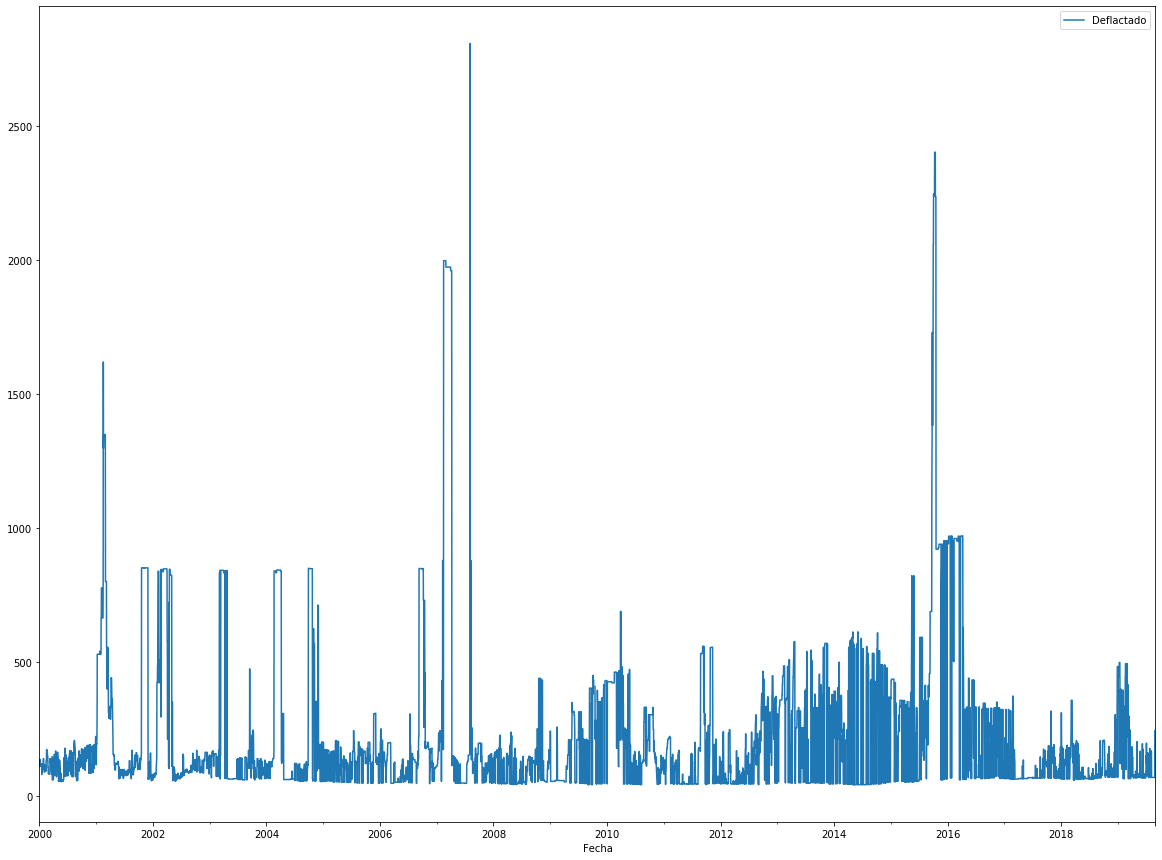

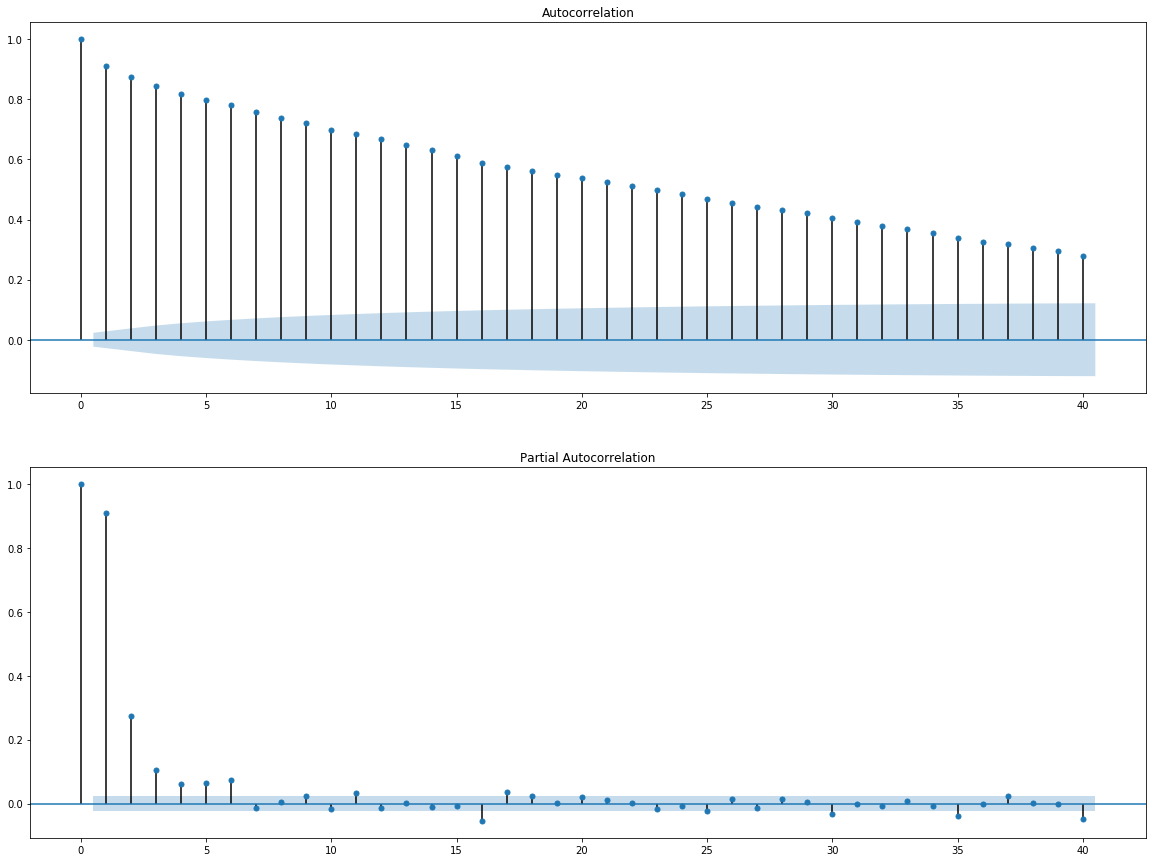

In [49]:
# SERIE NORMAL
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

M1Betania=Betania.drop(['Precio Oferta Ideal','INDICE'],axis=1)
plt.rcParams["figure.figsize"] = (20,15)
M1Betania.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1Betania.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1Betania, lags=40, ax=ax2)

X = M1Betania.values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(M1Betania['Deflactado'],  freq=365)
#result.plot()
#pyplot.show()

mean1=4.945326, mean2=4.957430
variance1=0.733327, variance2=0.876790


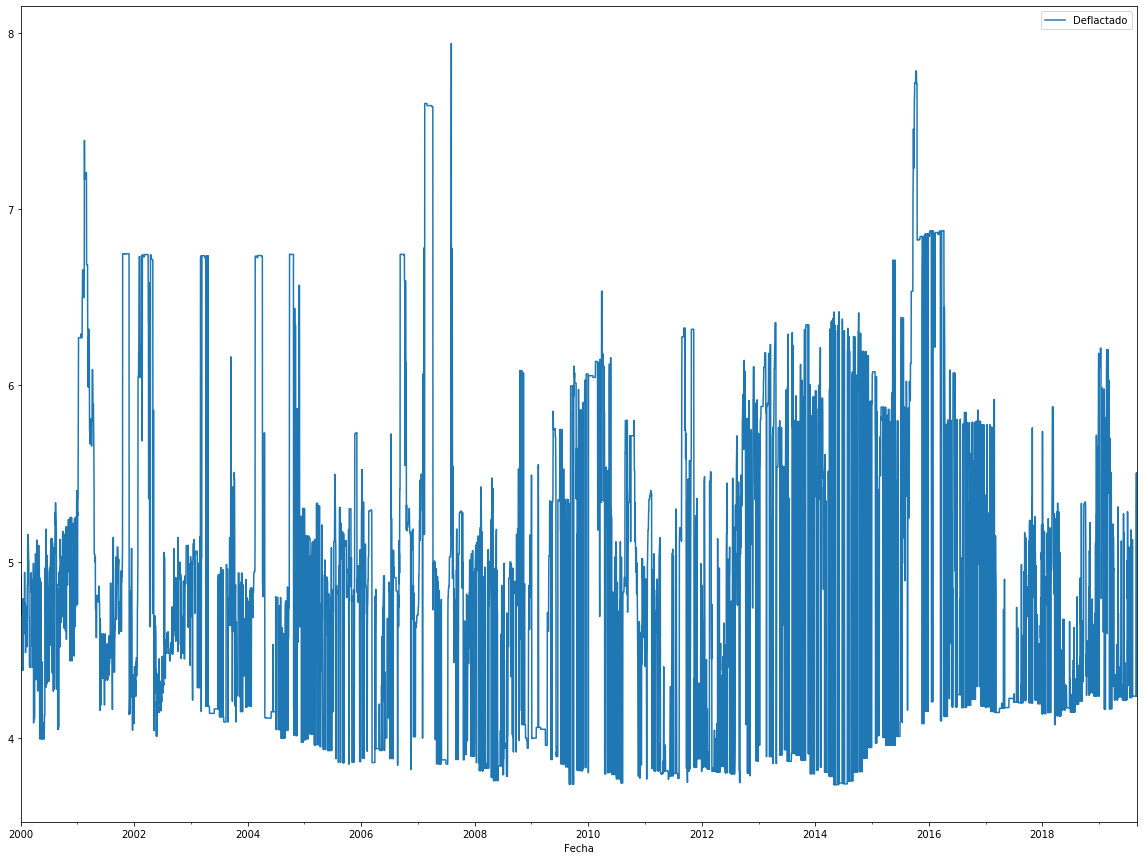

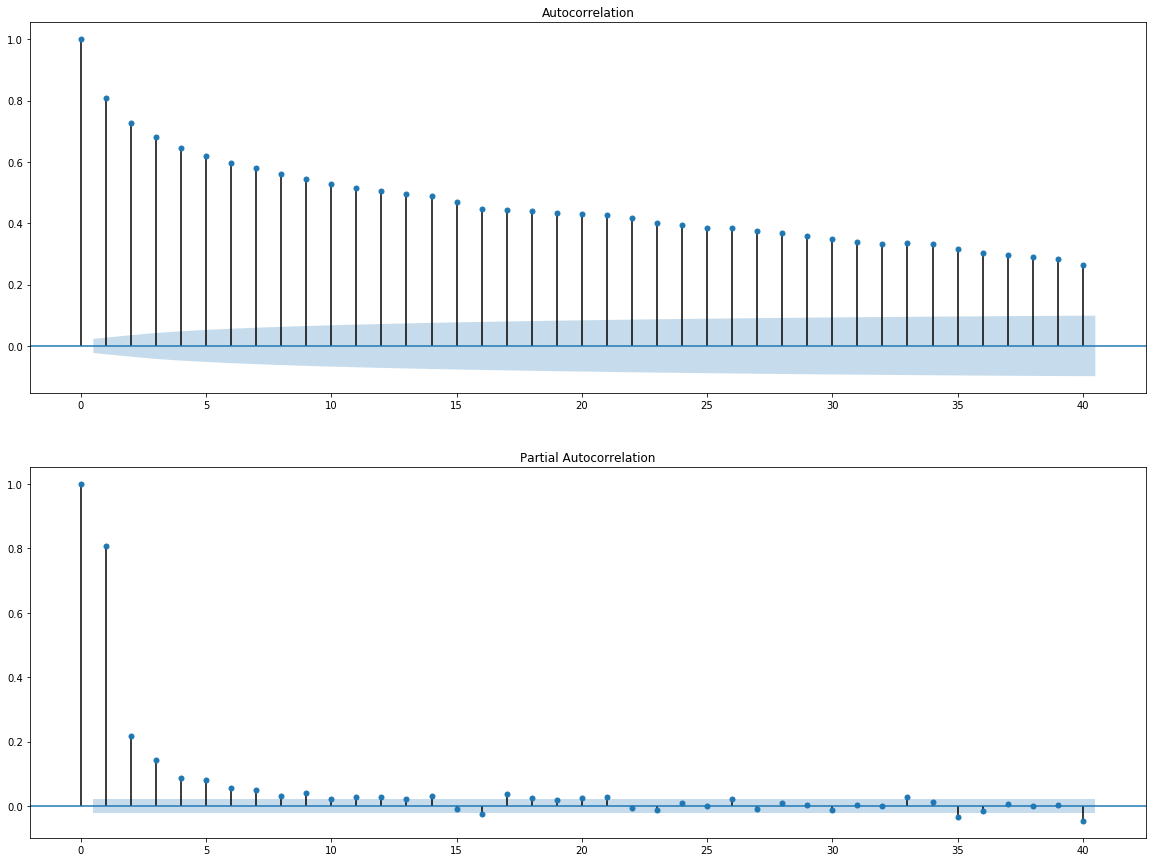

In [50]:
# TRANSFORMACION LOGARITMO PARA ESTABILIZAR VARIANZA
M1BetaniaLog=np.log(M1Betania)
M1BetaniaLog.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1BetaniaLog.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1BetaniaLog, lags=40, ax=ax2)

X = M1BetaniaLog.values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

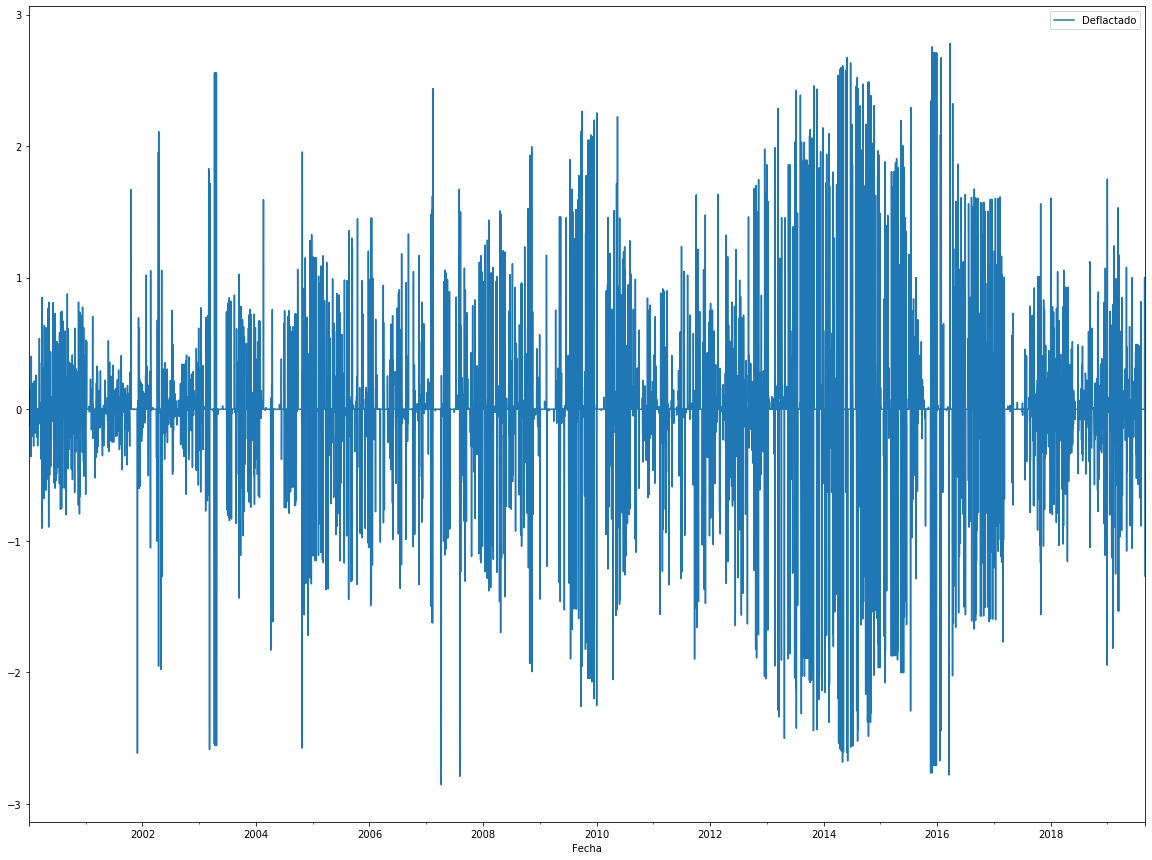

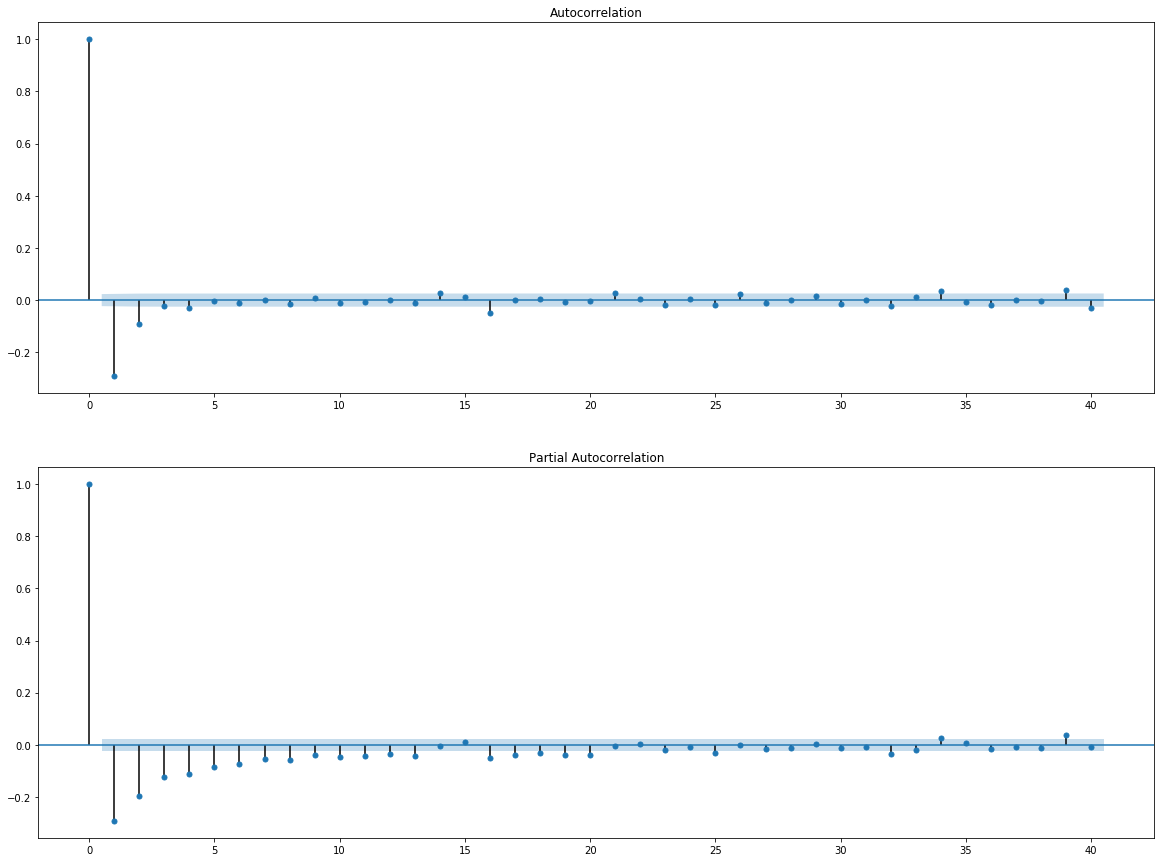

In [0]:
# PRIMERA DIFERENCIACIÓN PARA VOLVER ESTACIONAL
M1BetaniaLogDif=M1BetaniaLog.diff()
M1BetaniaLogDif=M1BetaniaLogDif[1:]
M1BetaniaLogDif.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1BetaniaLogDif.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1BetaniaLogDif, lags=40, ax=ax2)

In [51]:
#M1BetaniaLog=M1BetaniaLog.subtract(M1BetaniaLog.mean())
M1BetaniaLogA=M1BetaniaLog.iloc[:6465]
validar=M1BetaniaLog.iloc[6465:]
validar

            Deflactado
Fecha                 
2017-09-13    4.211466
2017-09-14    4.211466
2017-09-15    4.946051
2017-09-16    4.211466
2017-09-17    4.211466
...                ...
2019-08-27    4.237046
2019-08-28    4.237046
2019-08-29    5.239605
2019-08-30    5.504764
2019-08-31    4.237046

[718 rows x 1 columns]

In [0]:
pip install pmdarima

In [56]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
from pmdarima import auto_arima
auto_arima(M1BetaniaLogA).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimiza

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6465
Model:               SARIMAX(1, 1, 4)   Log Likelihood               -5002.068
Date:                Sat, 09 Nov 2019   AIC                          10018.135
Time:                        23:12:51   BIC                          10065.554
Sample:                             0   HQIC                         10034.541
                               - 6465                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.852e-06    4.7e-05     -0.146      0.884    -9.9e-05    8.53e-05
ar.L1          0.9409      0.010     98.165      0.000       0.922       0.960
ma.L1         -1.3604      0.013   -102.869      0.000      -1.386      -1.335
ma.L2          0.2483      0.013     18.981      0.000       0.223       0.274
ma.L3          0.0702      0.013      5.532      0.000       0.045       0.095
ma.L4          0.0486      0.009      5.582      0.000       0.032       0.066
sigma2         0.2766      0.004     69.453      0.000       0.269       0.284
===================================================================================
Ljung-Box (Q):                       81.72   Jarque-Bera (JB):              8697.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.90   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:             Deflactado   No. Observations:                 6465
Model:               SARIMAX(1, 1, 4)   Log Likelihood               -5002.068
Date:                Sat, 09 Nov 2019   AIC                          10018.135
Time:                        23:13:17   BIC                          10065.554
Sample:                    01-01-2000   HQIC                         10034.541
                         - 09-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.852e-06    4.7e-05     -0.146      0.884    -9.9e-05    8.53e-05
ar.L1          0.9409      0.010     98.165      0.000       0.922       0.960
ma.L1         -1.3604      0.013   -102.869      0.0

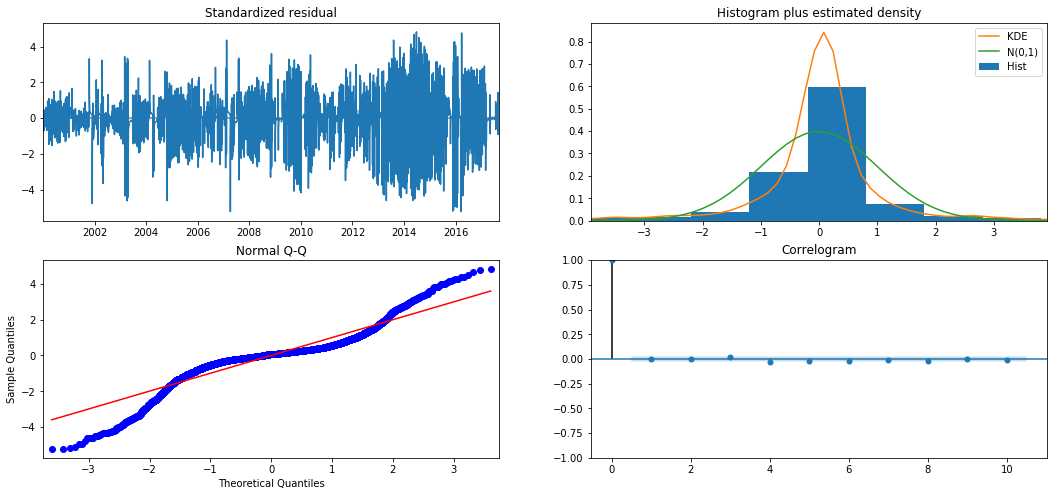

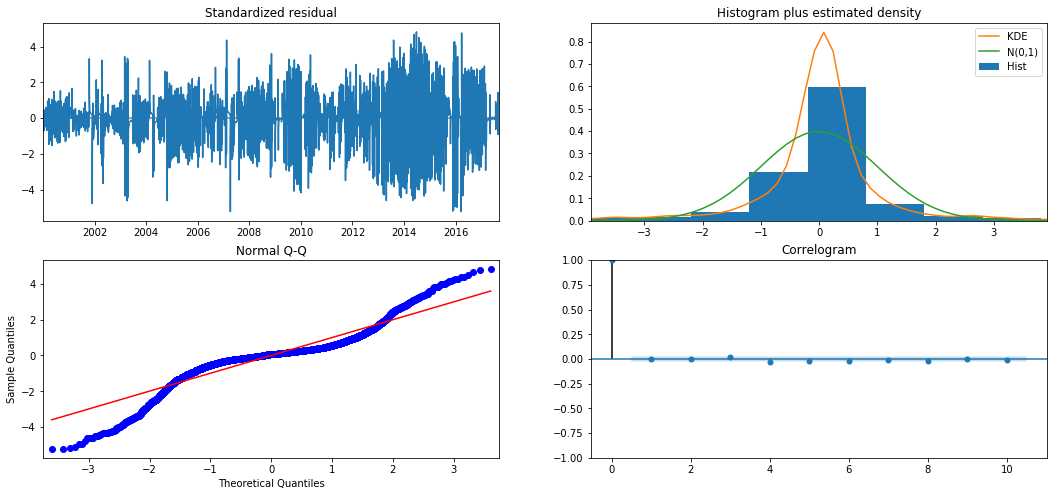

In [57]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
Modelo1Betania = sm.tsa.statespace.SARIMAX(M1BetaniaLogA, order=(1,1,4),trend='c').fit()
print(Modelo1Betania.summary())
print(stats.normaltest(Modelo1Betania.resid))

Modelo1Betania.plot_diagnostics(figsize=(18, 8))

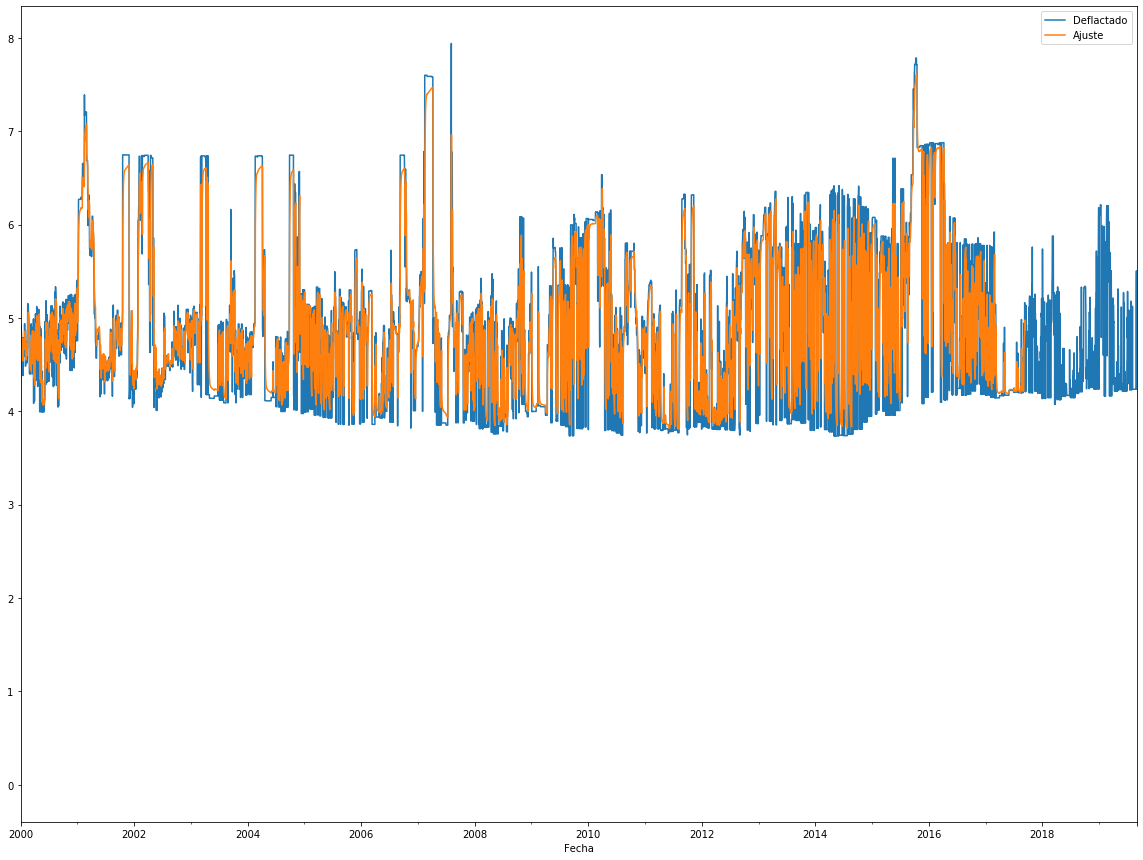

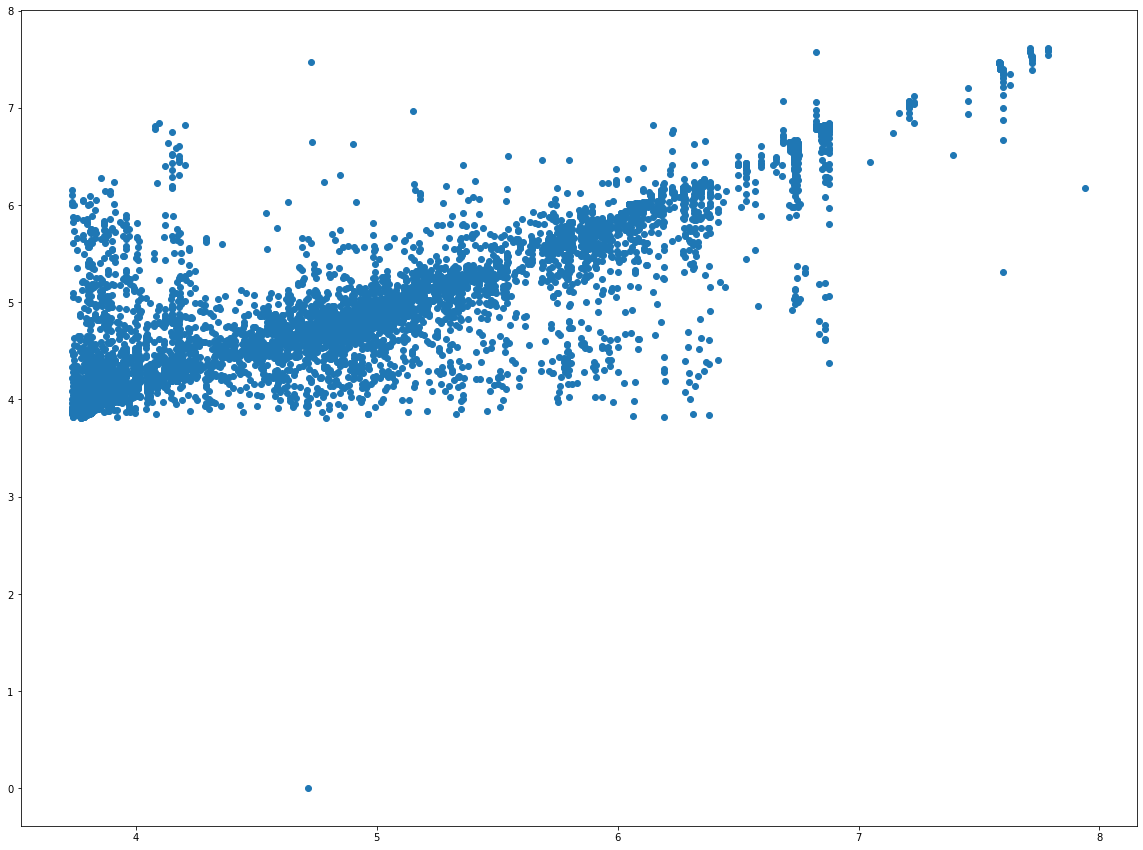

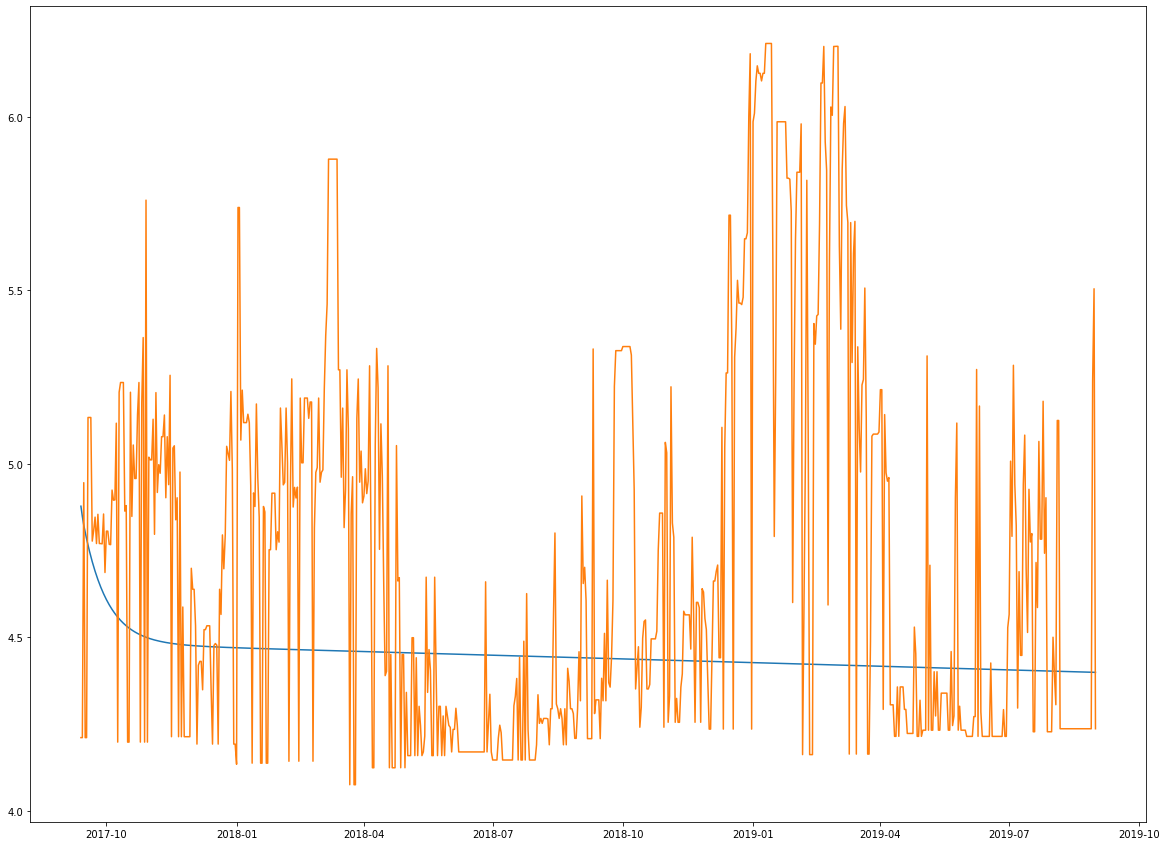

In [58]:
from sklearn.metrics import mean_squared_error
M1BetaniaLog['Ajuste'] = Modelo1Betania.fittedvalues  
plot = M1BetaniaLog[['Deflactado', 'Ajuste']].plot(figsize=(20, 15))

plt.figure(figsize=(20,15))
plt.scatter(M1BetaniaLog['Deflactado'],M1BetaniaLog['Ajuste'])
plt.show()

pred = Modelo1Betania.predict('2017-09-12','2019-08-31')[1:]
plt.plot(pred)
plt.plot(validar)
plt.show()

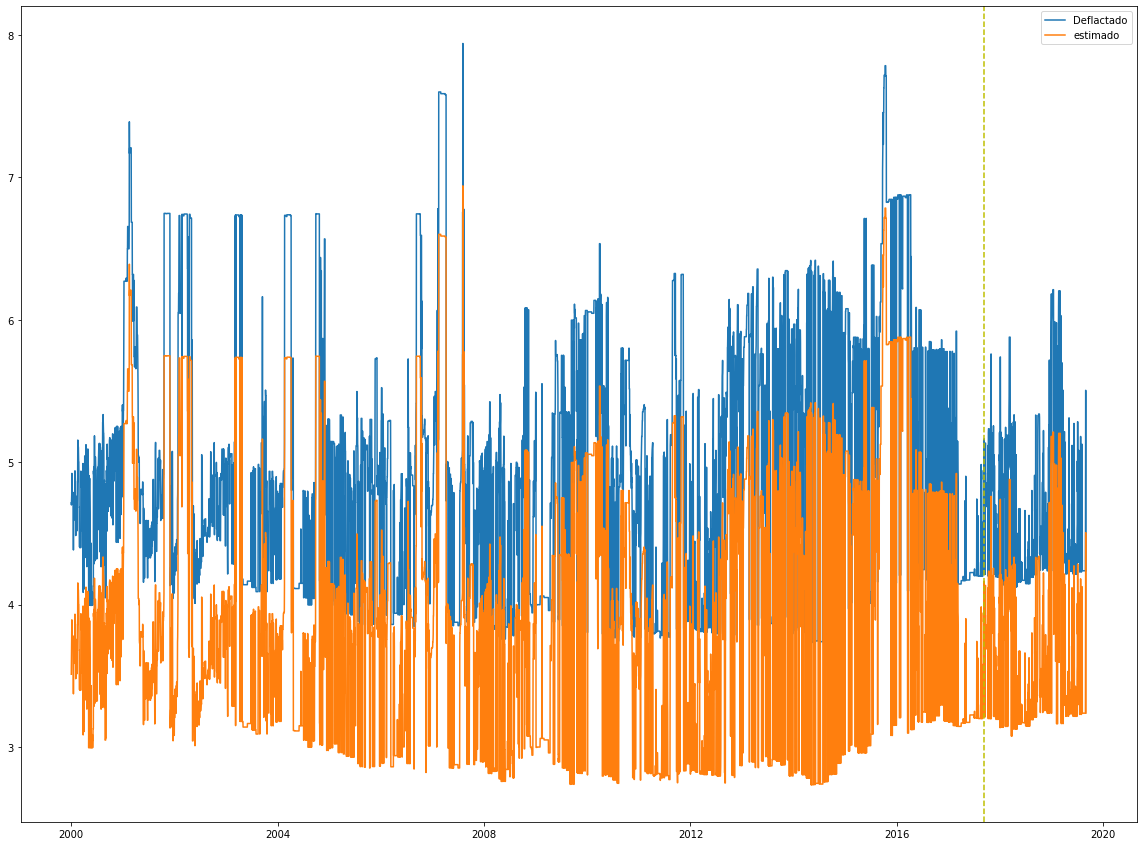

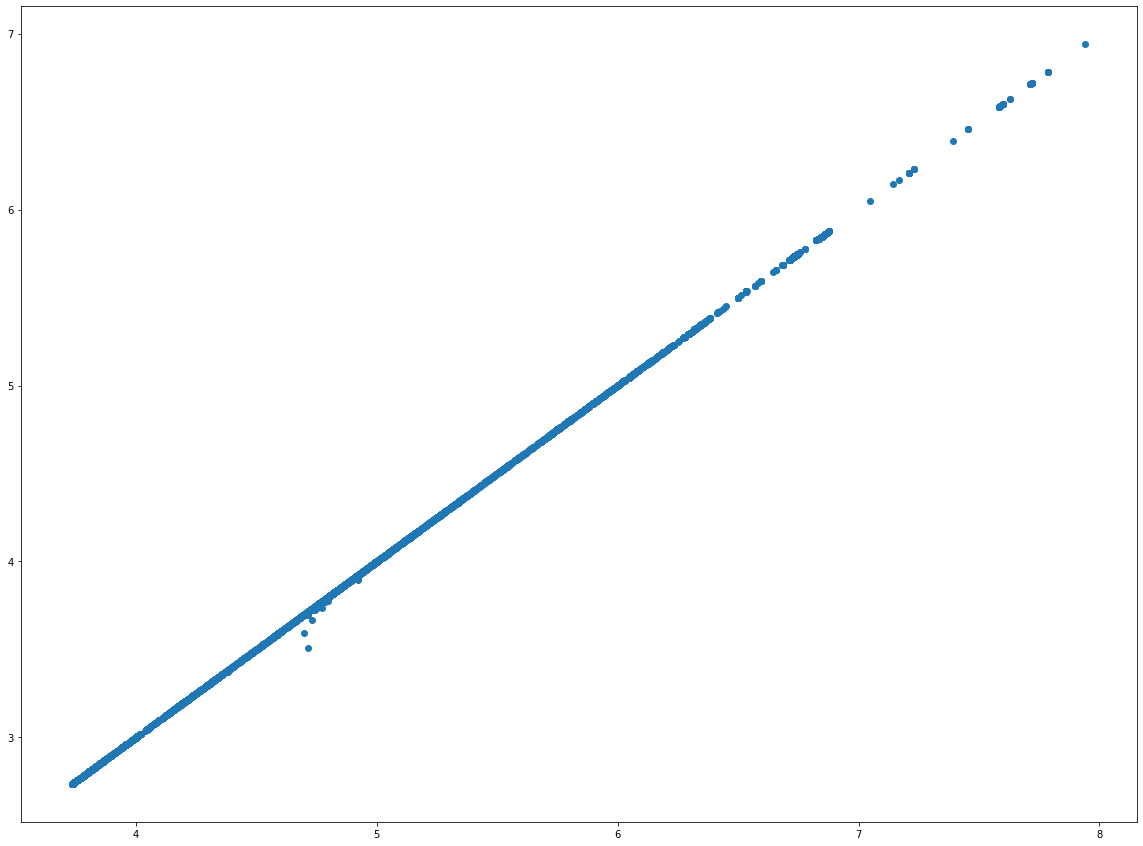

In [53]:
import statsmodels
ar=[0.9409]
ma=[-1.3604,0.2483,0.0702,0.0486]
sigma=[0.2766]
res=statsmodels.tsa.innovations.arma_innovations.arma_innovations(M1BetaniaLog['Deflactado'],ar_params=ar,ma_params=ma,sigma2=sigma)
innovaciones=res[0]
innovaciones_mse=res[1]
estimado=M1BetaniaLog['Deflactado'].values-innovaciones_mse
estimado=pd.DataFrame(estimado,index=M1BetaniaLog['Deflactado'].index,columns=['estimado'])

plt.plot(M1BetaniaLog['Deflactado'])
plt.plot(estimado)
plt.legend(['Deflactado','estimado'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()

plt.figure(figsize=(20,15))
plt.scatter(M1BetaniaLog['Deflactado'],estimado)
plt.show()

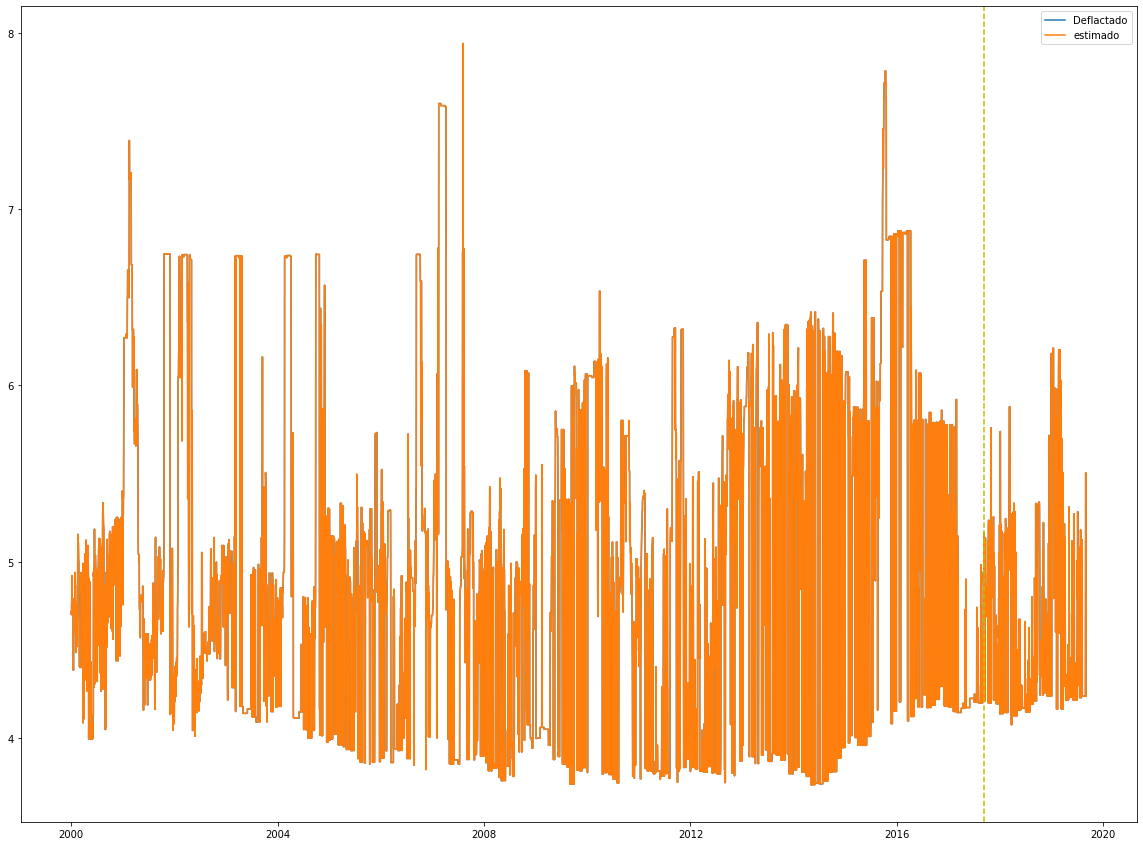

In [59]:
plt.plot(M1BetaniaLog['Deflactado'])
plt.plot(estimado['estimado']+innovaciones_mse)
plt.legend(['Deflactado','estimado'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()

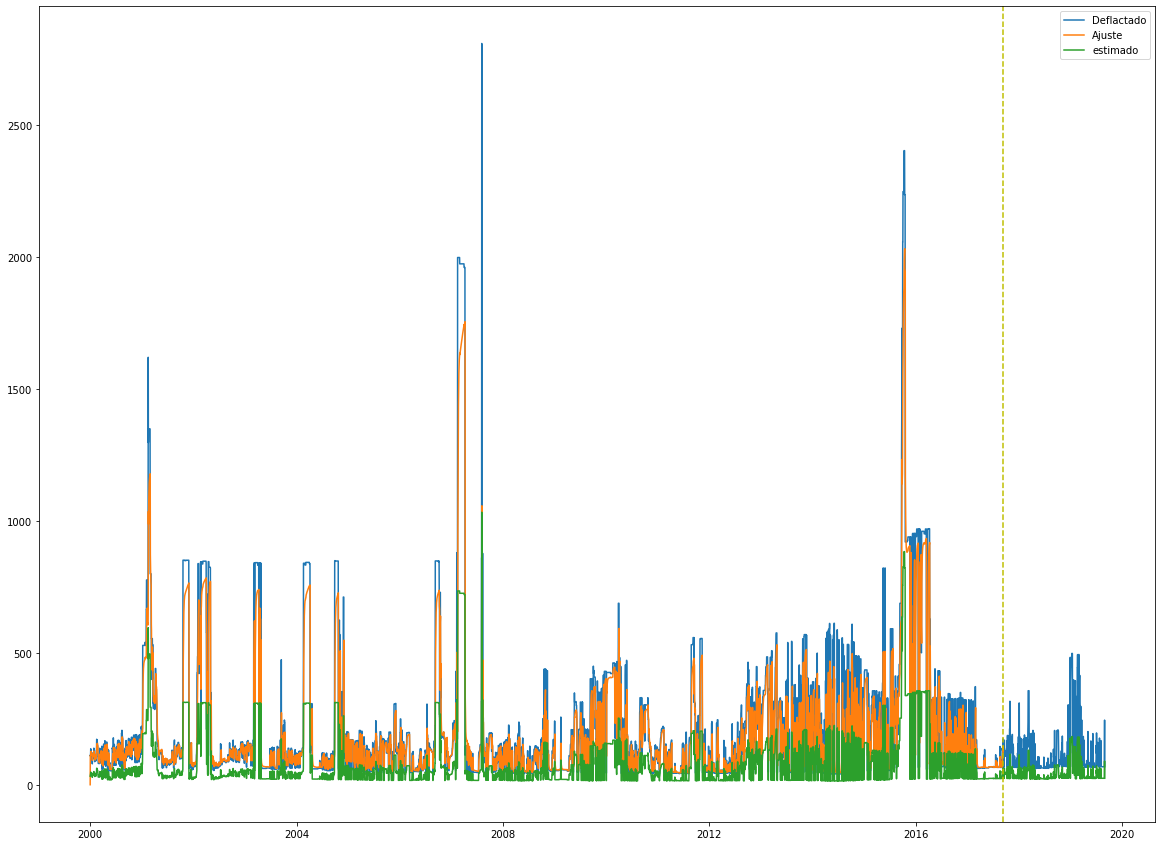

In [60]:
FM1Betania=np.exp(M1BetaniaLog)
Festimado=np.exp(estimado)
plt.plot(FM1Betania['Deflactado'])
plt.plot(FM1Betania['Ajuste'])
plt.plot(Festimado)
plt.legend(['Deflactado','Ajuste','estimado'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()

In [0]:
a=np.r_[M1BetaniaLog['Deflactado'][0],fit['fit']].cumsum()
a=pd.DataFrame(a[1:],index=M1BetaniaLog['Deflactado'].index)

b=np.r_[M1BetaniaLog['Deflactado'][0],M1BetaniaLog['Deflactado']].cumsum()
b=pd.DataFrame(b[1:],index=M1BetaniaLog['Deflactado'].index)

plt.plot(b)
plt.plot(a)
plt.legend(['Deflactado','fit'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()


# MODELO ARIMA PARA TEBSAB

mean1=196.491550, mean2=283.797096
variance1=3166.012702, variance2=8616.437531


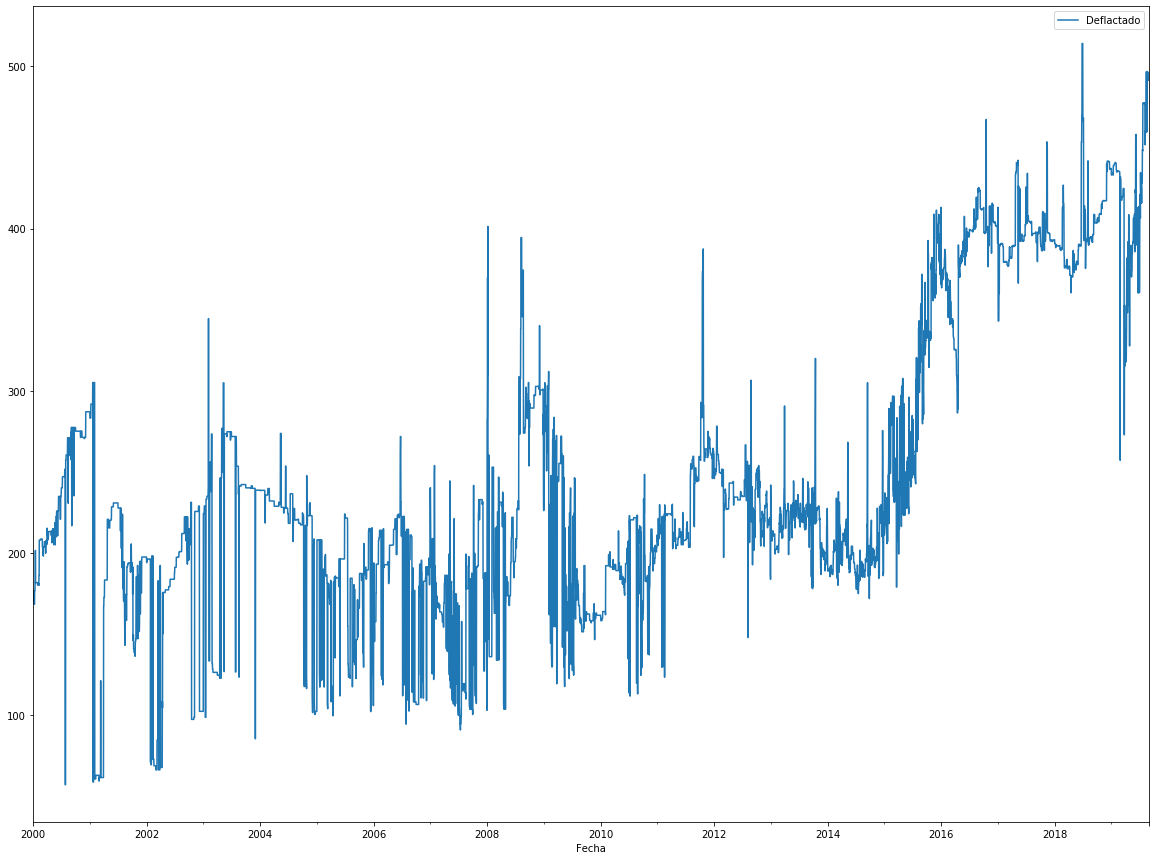

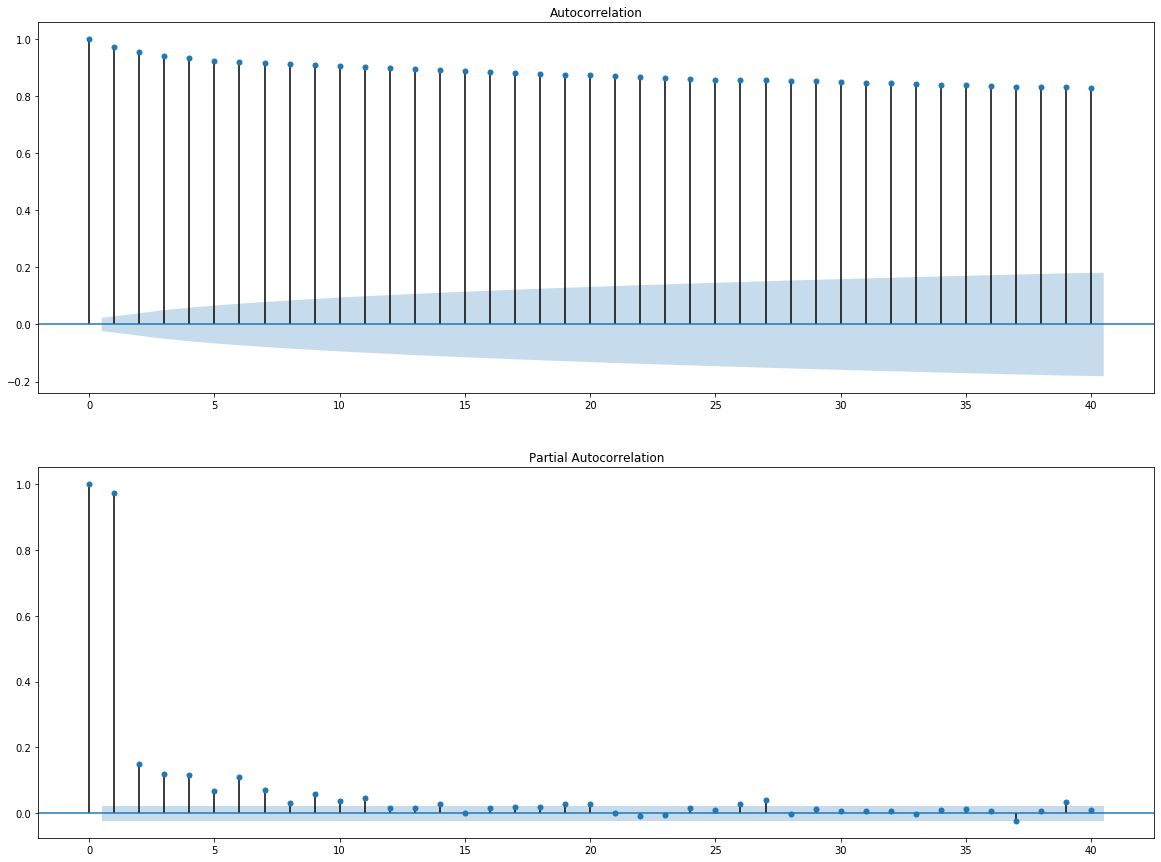

In [63]:
# SERIE NORMAL
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

M1Tebsab=Tebsab.drop(['Precio Oferta Ideal','INDICE'],axis=1)
plt.rcParams["figure.figsize"] = (20,15)
M1Tebsab.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1Tebsab.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1Tebsab, lags=40, ax=ax2)

X = M1Tebsab.values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(M1Tebsab, freq=365)
#result.plot()
#pyplot.show()

mean1=5.229473, mean2=5.594419
variance1=0.117622, variance2=0.108411


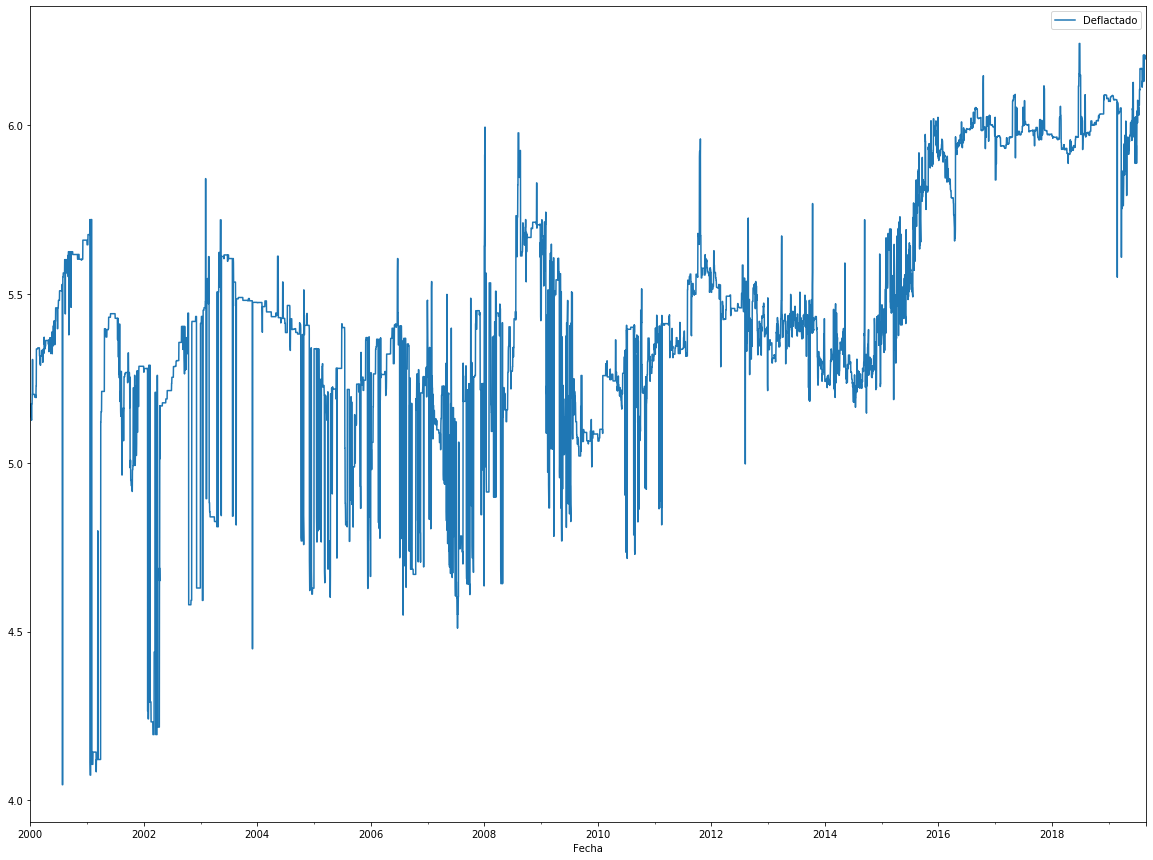

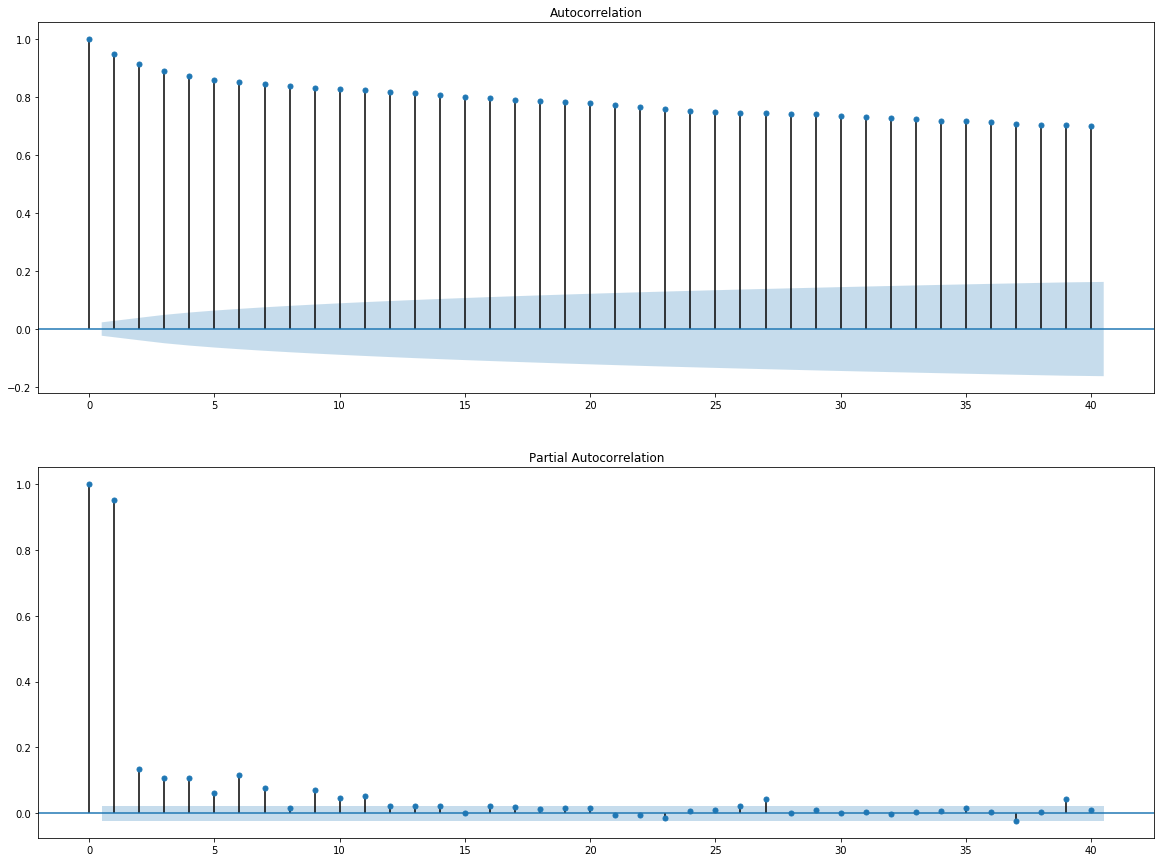

In [64]:
# TRANSFORMACION LOGARITMO PARA ESTABILIZAR VARIANZA
M1TebsabLog=np.log(M1Tebsab)
M1TebsabLog.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1TebsabLog.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1TebsabLog, lags=40, ax=ax2)

X = M1TebsabLog.values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

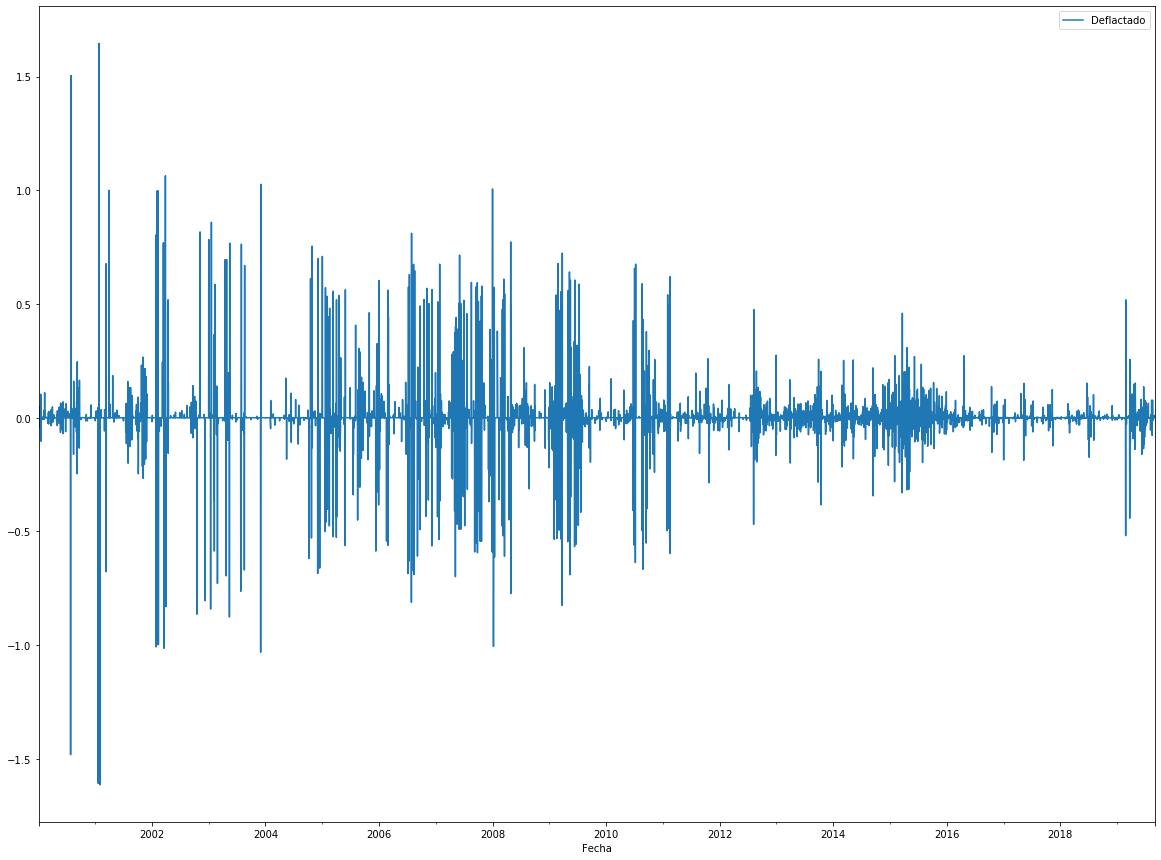

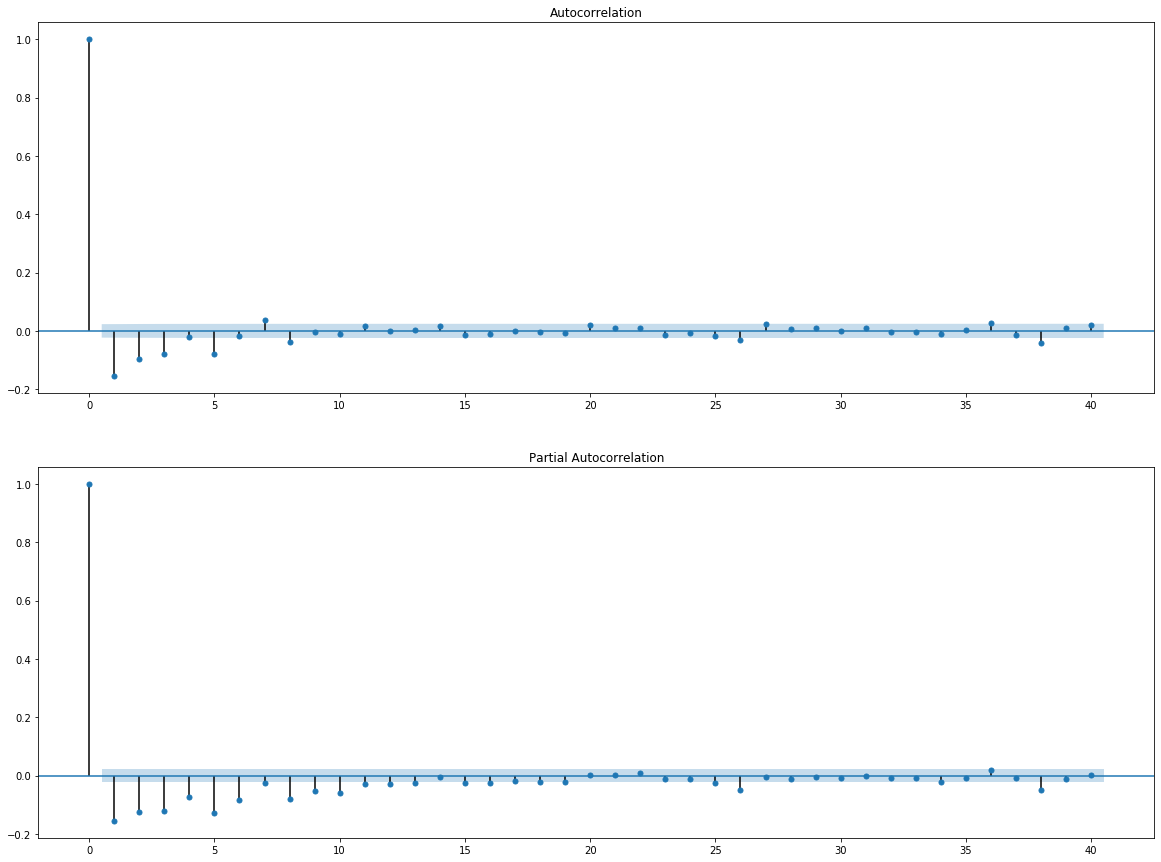

In [65]:
# PRIMERA DIFERENCIACIÓN PARA VOLVER ESTACIONAL
M1TebsabLogDif=M1TebsabLog.diff()
M1TebsabLogDif=M1TebsabLogDif[1:]
M1TebsabLogDif.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1TebsabLogDif.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1TebsabLogDif, lags=40, ax=ax2)

In [66]:
M1TebsabLogA=M1TebsabLog.iloc[:6465]
validar=M1TebsabLog.iloc[6465:]
validar

            Deflactado
Fecha                 
2017-09-13    5.985793
2017-09-14    5.986340
2017-09-15    5.983468
2017-09-16    5.983677
2017-09-17    5.983755
...                ...
2019-08-27    6.198405
2019-08-28    6.197832
2019-08-29    6.197832
2019-08-30    6.197694
2019-08-31    6.207302

[718 rows x 1 columns]

In [9]:
pip install pmdarima

     |████████████████████████████████| 1.1MB 3.5MB/s 


In [10]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
from pmdarima import auto_arima
auto_arima(M1TebsabLogA).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6465
Model:               SARIMAX(1, 1, 1)   Log Likelihood                4546.613
Date:                Sat, 09 Nov 2019   AIC                          -9085.226
Time:                        21:24:20   BIC                          -9058.130
Sample:                             0   HQIC                         -9075.852
                               - 6465                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.666e-05      0.000      0.218      0.827      -0.000       0.000
ar.L1          0.6633      0.008     83.109      0.000       0.648       0.679
ma.L1         -0.9008      0.005   -166.256      0.000      -0.911      -0.890
sigma2         0.0143   7.77e-05    184.649      0.000       0.014       0.014
===================================================================================
Ljung-Box (Q):                       79.51   Jarque-Bera (JB):            322065.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:             Deflactado   No. Observations:                 6465
Model:               SARIMAX(1, 1, 1)   Log Likelihood                4546.613
Date:                Sat, 09 Nov 2019   AIC                          -9085.226
Time:                        23:18:07   BIC                          -9058.130
Sample:                    01-01-2000   HQIC                         -9075.852
                         - 09-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.666e-05      0.000      0.218      0.827      -0.000       0.000
ar.L1          0.6633      0.008     83.109      0.000       0.648       0.679
ma.L1         -0.9008      0.005   -166.256      0.0

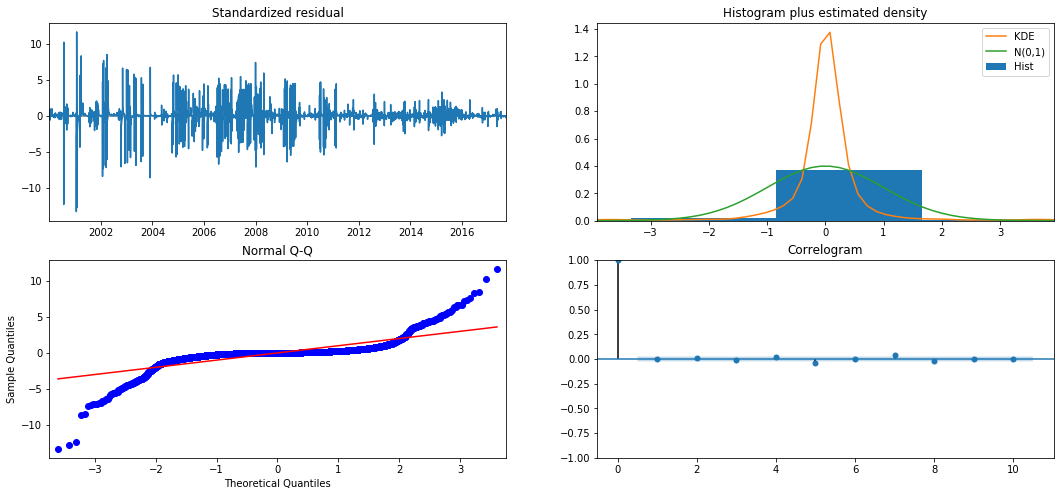

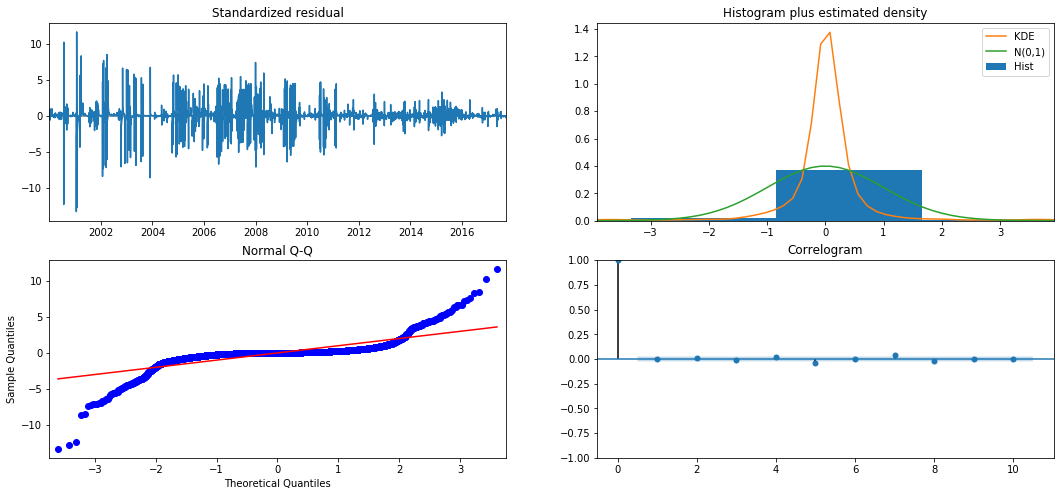

In [67]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
Modelo1Tebsab = sm.tsa.statespace.SARIMAX(M1TebsabLogA, order=(1,1,1),trend='c').fit(disp=False)
print(Modelo1Tebsab.summary())
print(stats.normaltest(Modelo1Tebsab.resid))

Modelo1Tebsab.plot_diagnostics(figsize=(18, 8))

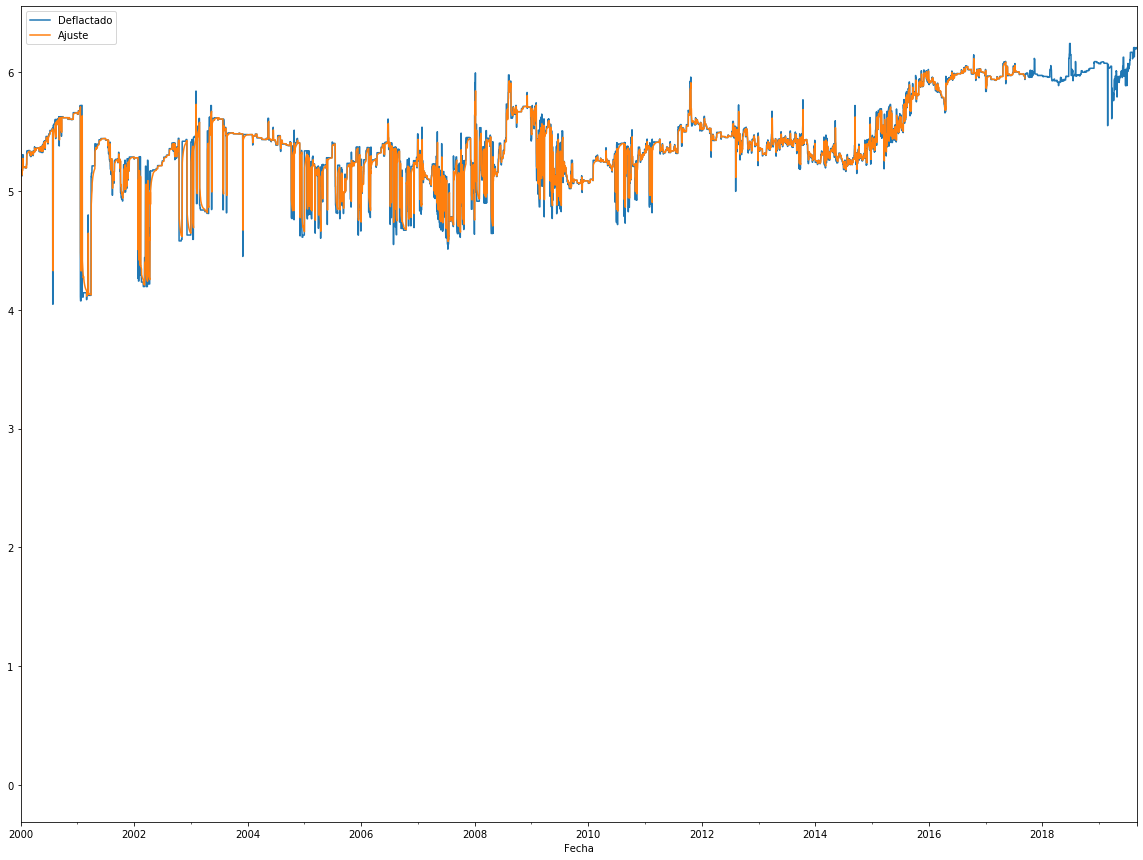

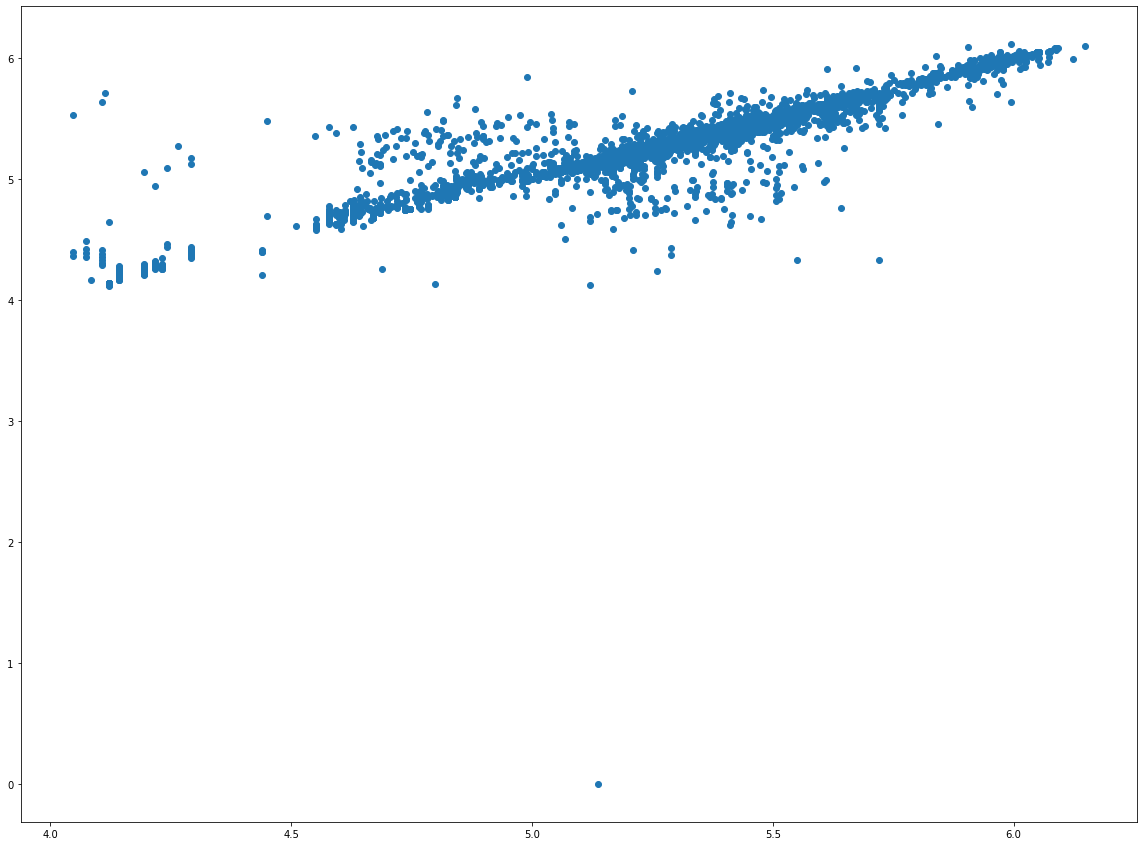

ARIMA model MSE:0.005627206203648923


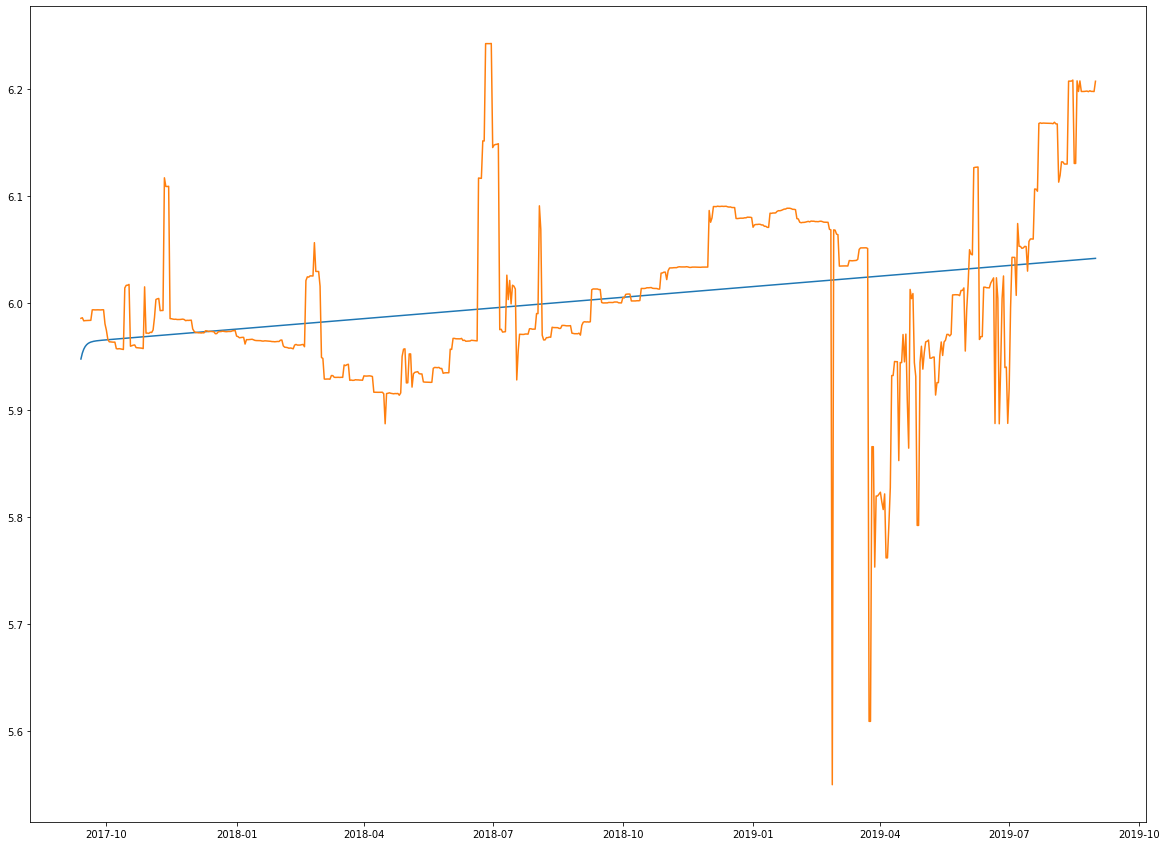

In [68]:
from sklearn.metrics import mean_squared_error
M1TebsabLog['Ajuste'] = Modelo1Tebsab.fittedvalues  
plot = M1TebsabLog[['Deflactado', 'Ajuste']].plot(figsize=(20, 15))

plt.figure(figsize=(20,15))
plt.scatter(M1TebsabLog['Deflactado'],M1TebsabLog['Ajuste'])
plt.show()

pred = Modelo1Tebsab.predict('2017-09-12','2019-08-31')[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(validar,pred)))
plt.plot(pred)
plt.plot(validar)
plt.show()

<function matplotlib.pyplot.show>

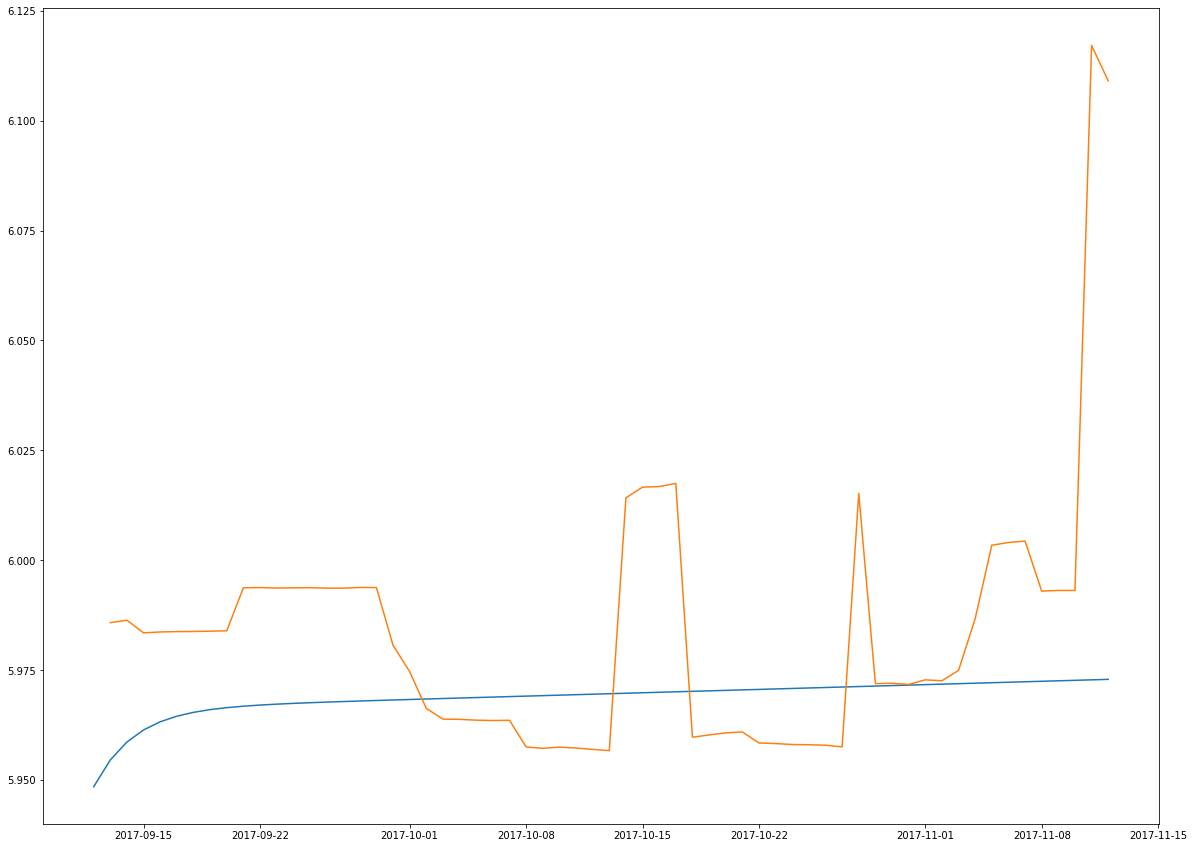

In [13]:
predi = Modelo1Tebsab.predict(start='2017-09-12',end='2017-11-12',dynamic=True)
plt.plot(predi)
plt.plot(validar['2017-09-12':'2017-11-12'])
plt.show

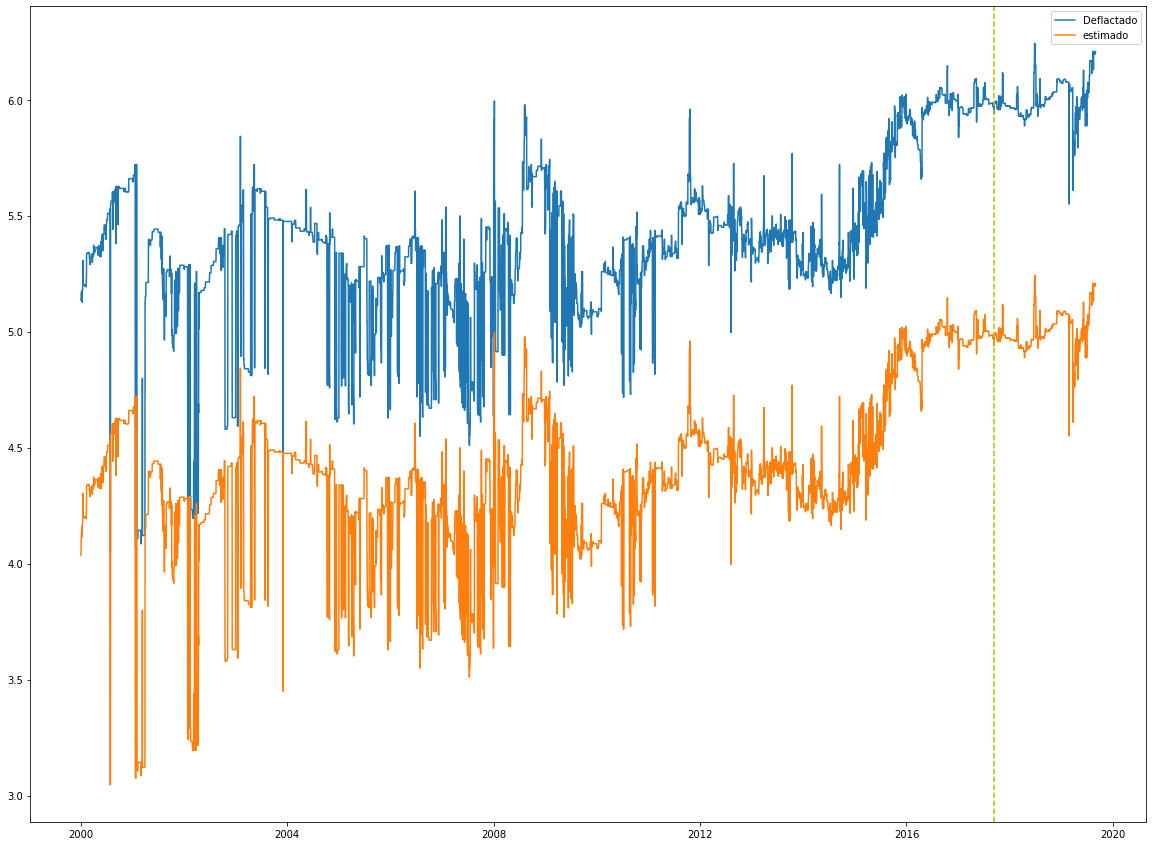

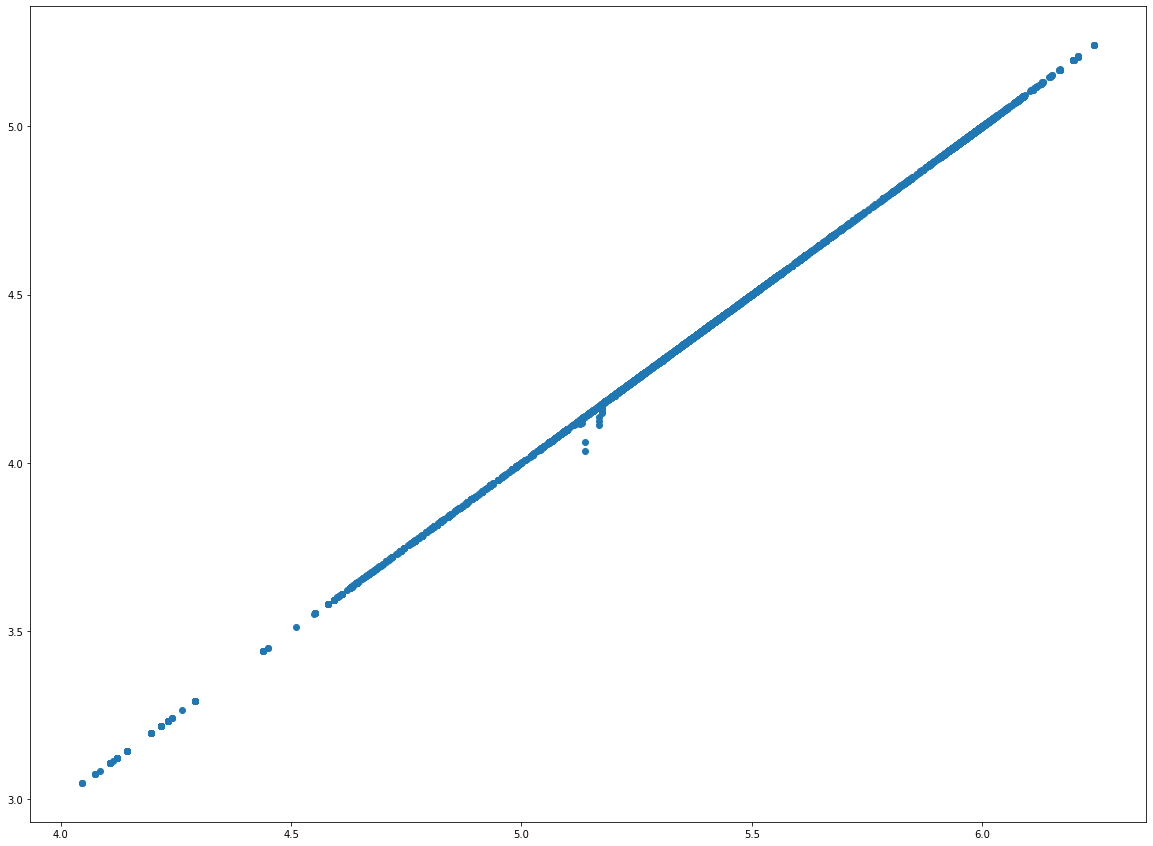

In [69]:
import statsmodels
ar=[0.6633]
ma=[-0.9008]
sigma=[0.0143]
res=statsmodels.tsa.innovations.arma_innovations.arma_innovations(M1TebsabLog['Deflactado'],ar_params=ar,ma_params=ma,sigma2=sigma)
innovaciones=res[0]
innovaciones_mse=res[1]
estimado=M1TebsabLog['Deflactado'].values-innovaciones_mse
estimado=pd.DataFrame(estimado,index=M1TebsabLog['Deflactado'].index,columns=['estimado'])

plt.plot(M1TebsabLog['Deflactado'])
plt.plot(estimado['estimado'])
plt.legend(['Deflactado','estimado'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()

plt.figure(figsize=(20,15))
plt.scatter(M1TebsabLog['Deflactado'],estimado)
plt.show()

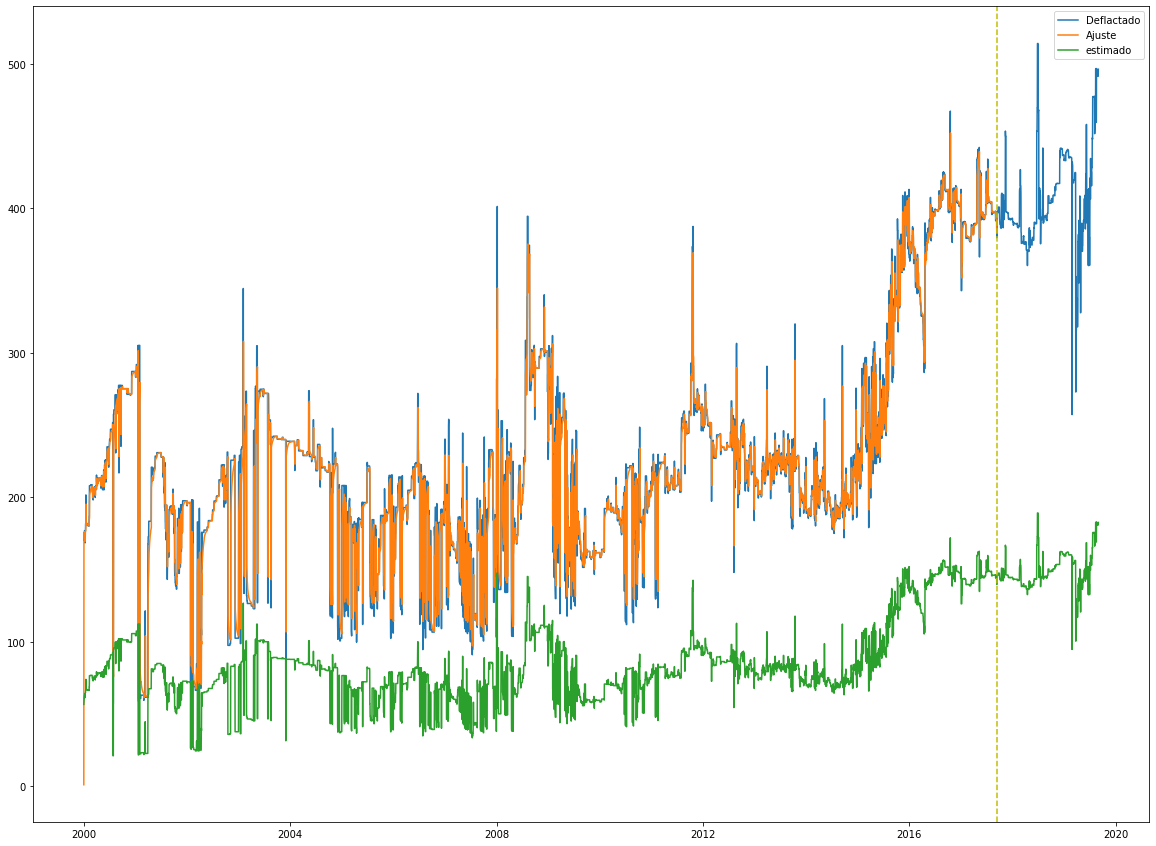

In [70]:
FM1Tebsab=np.exp(M1TebsabLog)
Festimado=np.exp(estimado)
plt.plot(FM1Tebsab['Deflactado'])
plt.plot(FM1Tebsab['Ajuste'])
plt.plot(Festimado)
plt.legend(['Deflactado','Ajuste','estimado'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()

# MODELO ARIMA PARA CHIVOR

mean1=102.324103, mean2=199.832992
variance1=3734.925590, variance2=98708.867027


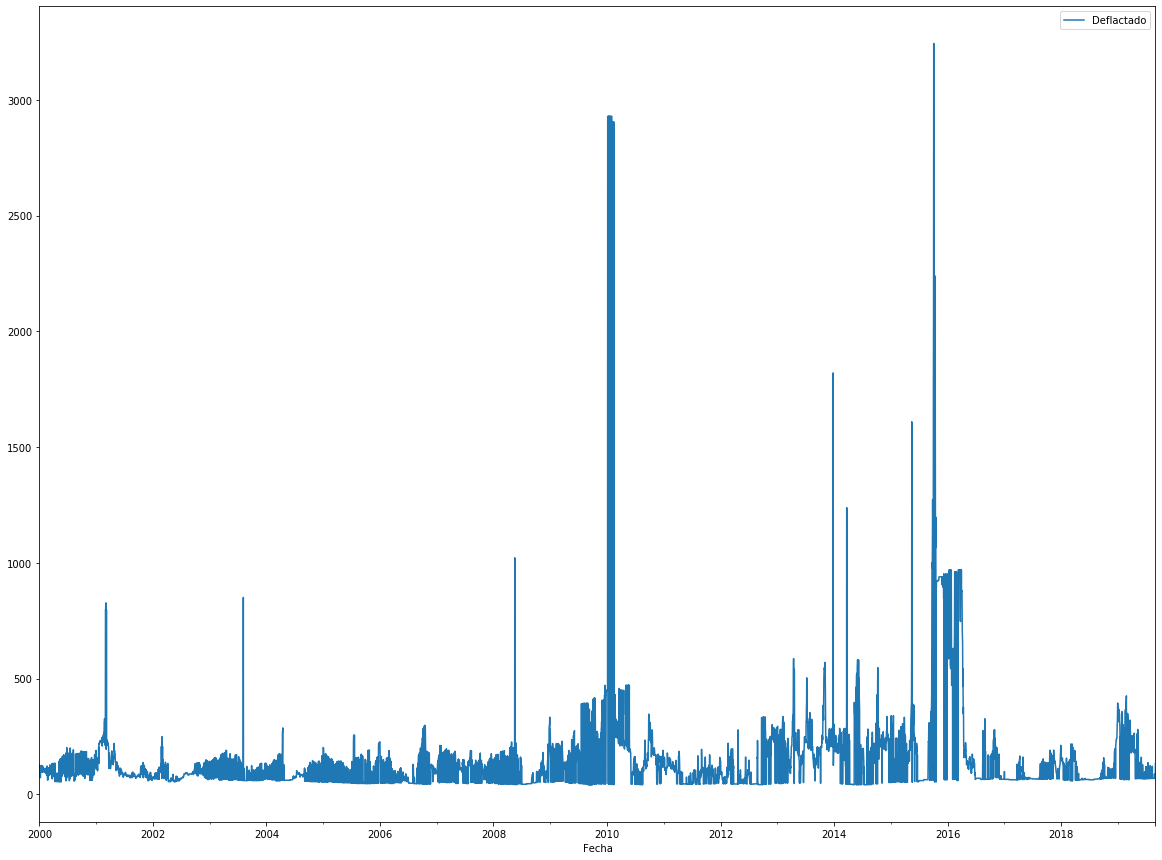

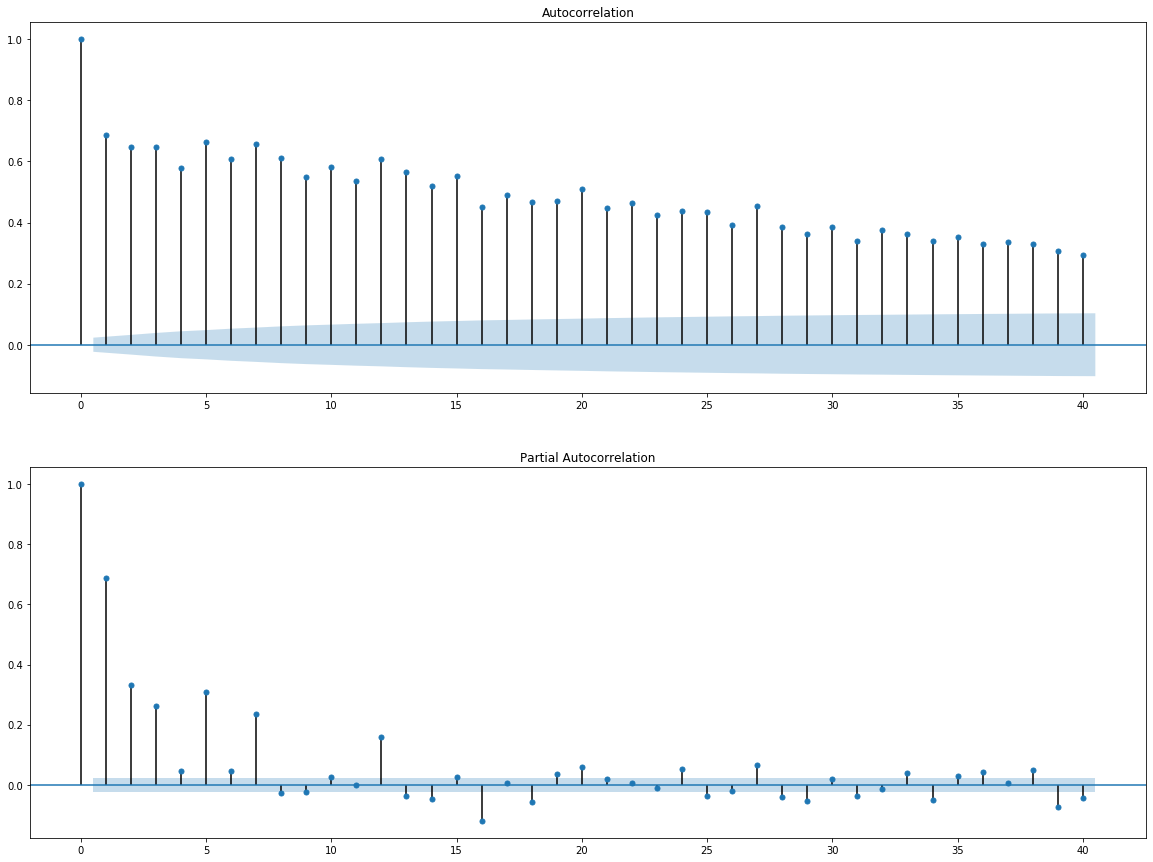

In [8]:
# SERIE NORMAL
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

M1Chivor=Chivor.drop(['Precio Oferta Ideal','INDICE'],axis=1)
plt.rcParams["figure.figsize"] = (20,15)
M1Chivor.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1Chivor.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1Chivor, lags=40, ax=ax2)

X = M1Chivor.values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(M1Tebsab, freq=365)
#result.plot()
#pyplot.show()

mean1=4.506693, mean2=4.840544
variance1=0.226494, variance2=0.712643


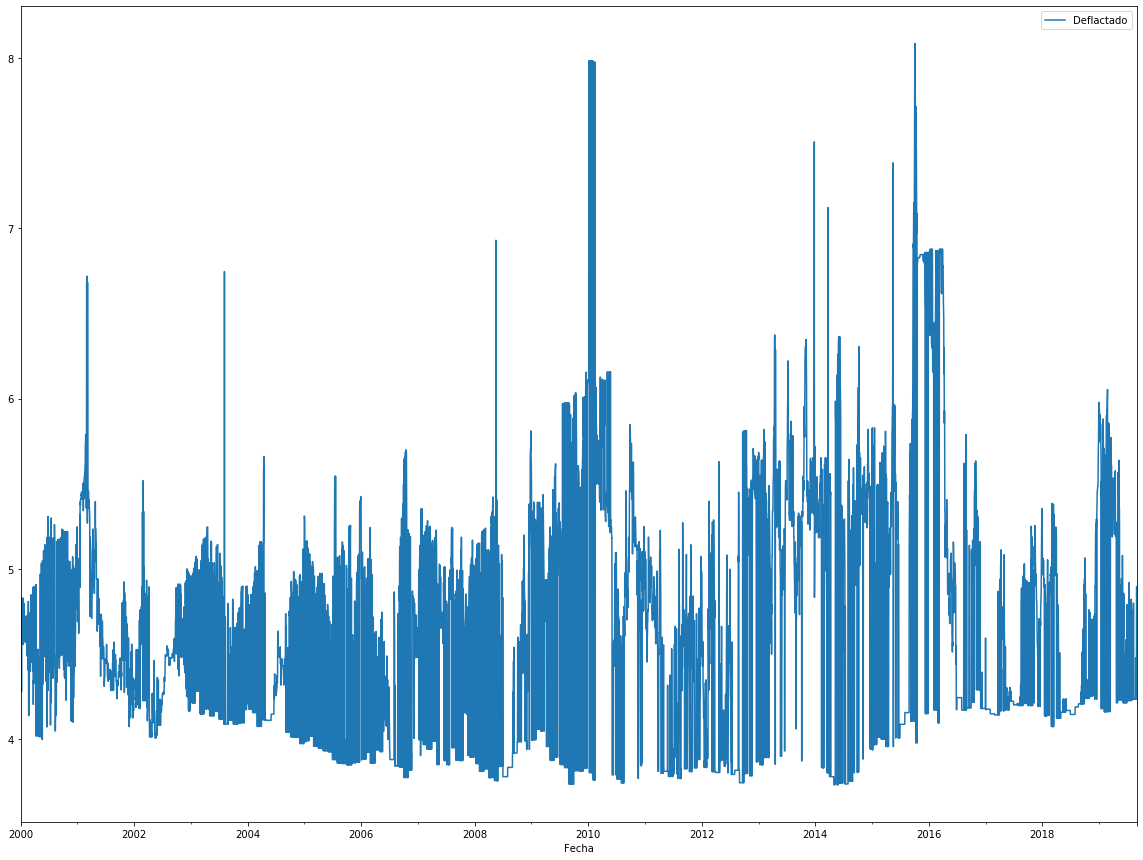

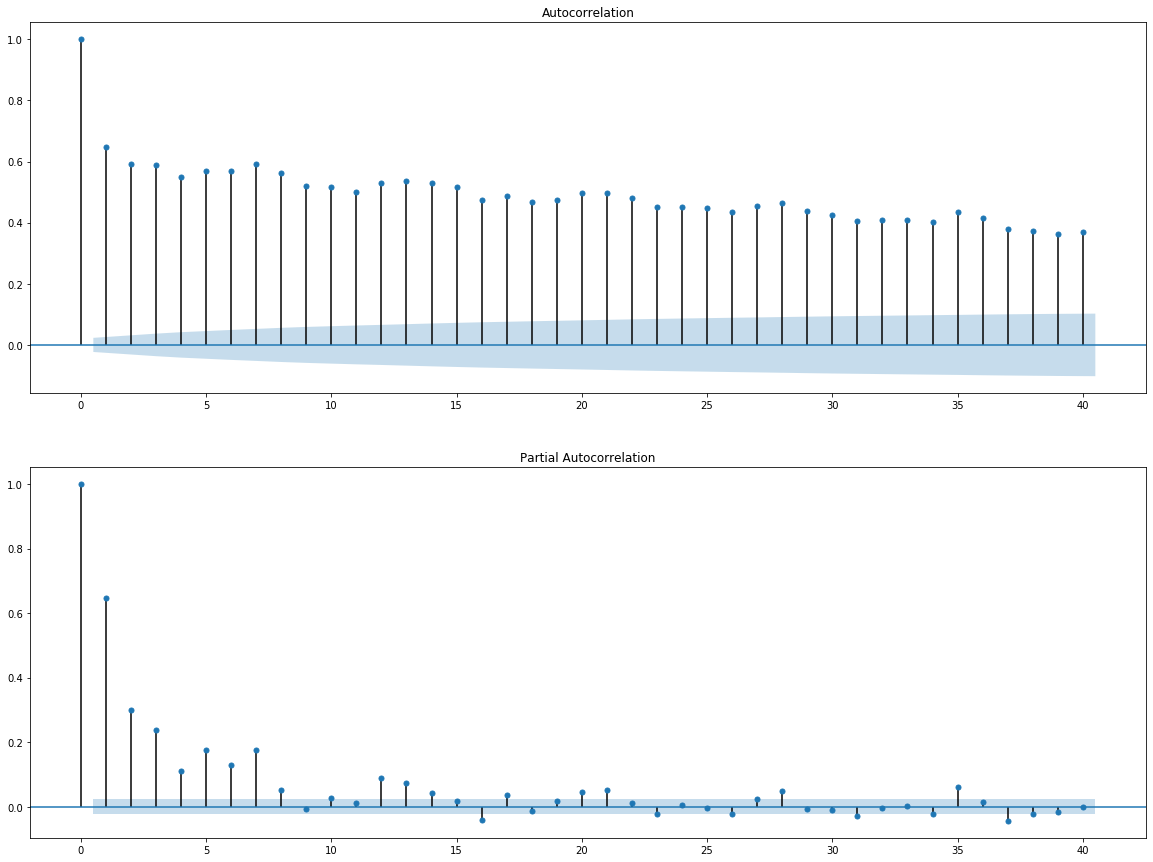

In [12]:
# TRANSFORMACION LOGARITMO PARA ESTABILIZAR VARIANZA
M1ChivorLog=np.log(M1Chivor)
M1ChivorLog.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1ChivorLog.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1ChivorLog, lags=40, ax=ax2)

X = M1ChivorLog.values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

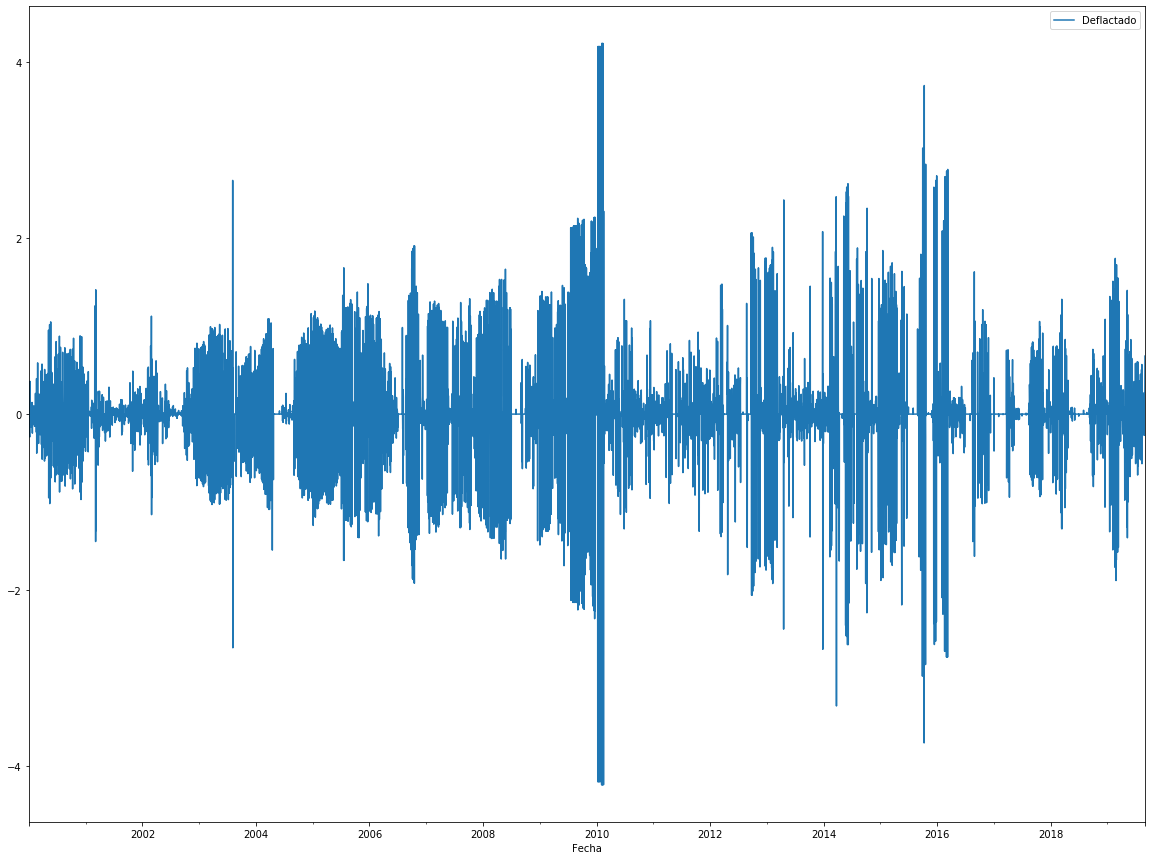

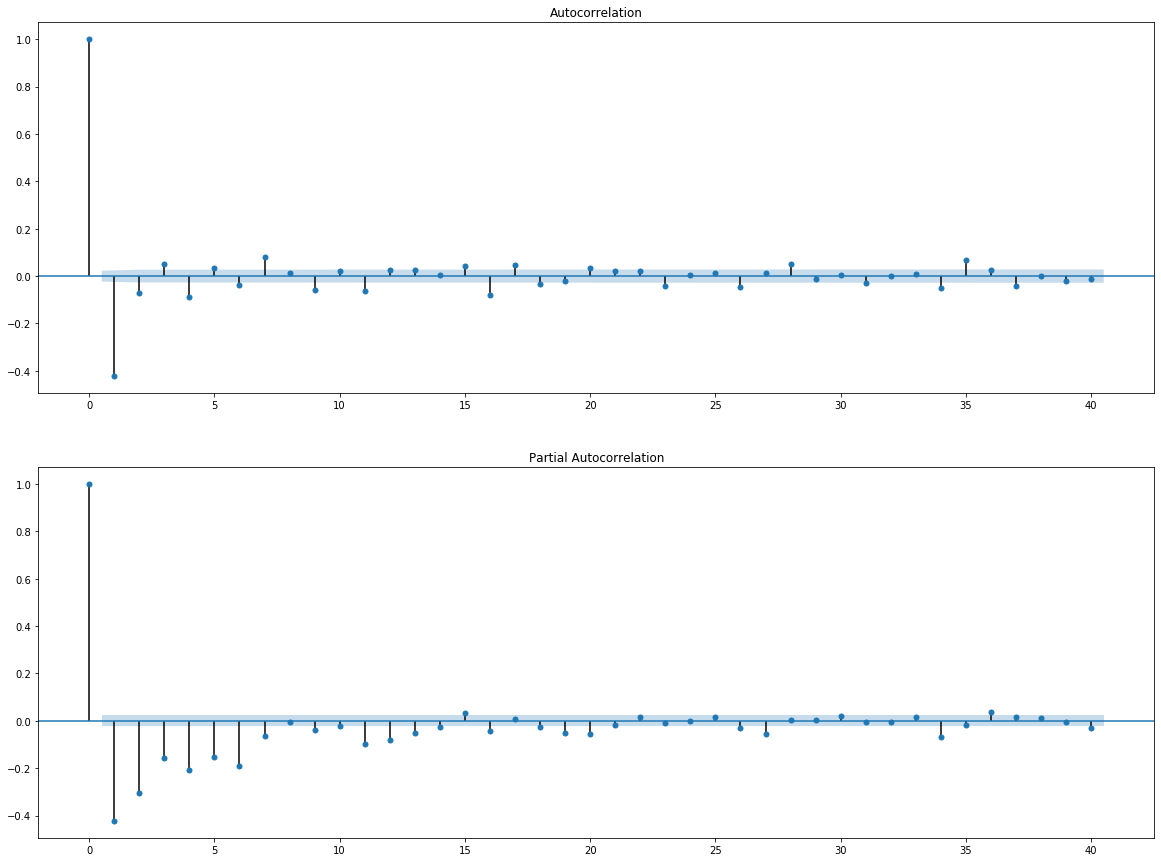

In [13]:
# PRIMERA DIFERENCIACIÓN PARA VOLVER ESTACIONAL
M1ChivorLogDif=M1ChivorLog.diff()
M1ChivorLogDif=M1ChivorLogDif[1:]
M1ChivorLogDif.plot()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(M1ChivorLogDif.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(M1ChivorLogDif, lags=40, ax=ax2)

In [14]:
M1ChivorLogA=M1ChivorLog.iloc[:6465]
validar=M1ChivorLog.iloc[6465:]
validar

            Deflactado
Fecha                 
2017-09-13    4.211466
2017-09-14    4.939461
2017-09-15    4.211466
2017-09-16    4.865393
2017-09-17    4.773277
...                ...
2019-08-27    4.237046
2019-08-28    4.237046
2019-08-29    4.237046
2019-08-30    4.237046
2019-08-31    4.896244

[718 rows x 1 columns]

In [15]:
pip install pmdarima

In [16]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
from pmdarima import auto_arima
auto_arima(M1ChivorLogA).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6465
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -4656.103
Date:                Sat, 09 Nov 2019   AIC                           9334.206
Time:                        22:46:36   BIC                           9408.720
Sample:                             0   HQIC                          9359.986
                               - 6465                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.003      0.075      0.941      -0.006       0.007
ar.L1         -0.4977      0.018    -28.098      0.000      -0.532      -0.463
ar.L2          0.2350      0.013     17.800      0.000       0.209       0.261
ar.L3         -0.5492      0.013    -42.225      0.000      -0.575      -0.524
ar.L4         -0.8781      0.016    -56.450      0.000      -0.909      -0.848
ma.L1         -0.2686      0.019    -14.029      0.000      -0.306      -0.231
ma.L2         -0.6891      0.022    -31.989      0.000      -0.731      -0.647
ma.L3          0.7252      0.018     39.987      0.000       0.690       0.761
ma.L4          0.4200      0.021     20.463      0.000       0.380       0.460
ma.L5         -0.6840      0.015    -46.871      0.000      -0.713      -0.655
sigma2         0.2487      0.003     94.536      0.000       0.244       0.254
===================================================================================
Ljung-Box (Q):                      153.64   Jarque-Bera (JB):              8481.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.67   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:             Deflactado   No. Observations:                 6465
Model:               SARIMAX(4, 1, 5)   Log Likelihood               -4656.103
Date:                Sat, 09 Nov 2019   AIC                           9334.206
Time:                        22:48:49   BIC                           9408.720
Sample:                    01-01-2000   HQIC                          9359.986
                         - 09-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.003      0.075      0.941      -0.006       0.007
ar.L1         -0.4977      0.018    -28.098      0.000      -0.532      -0.463
ar.L2          0.2350      0.013     17.800      0.0

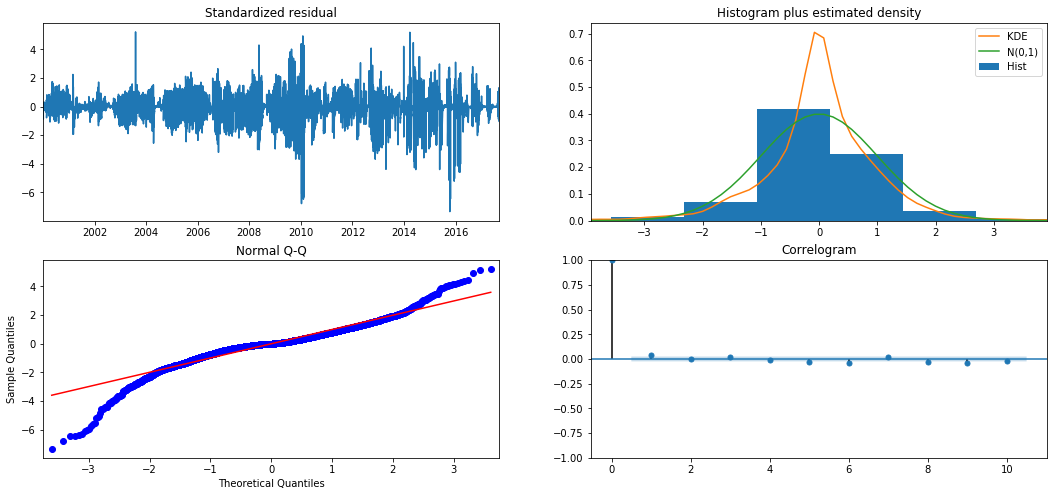

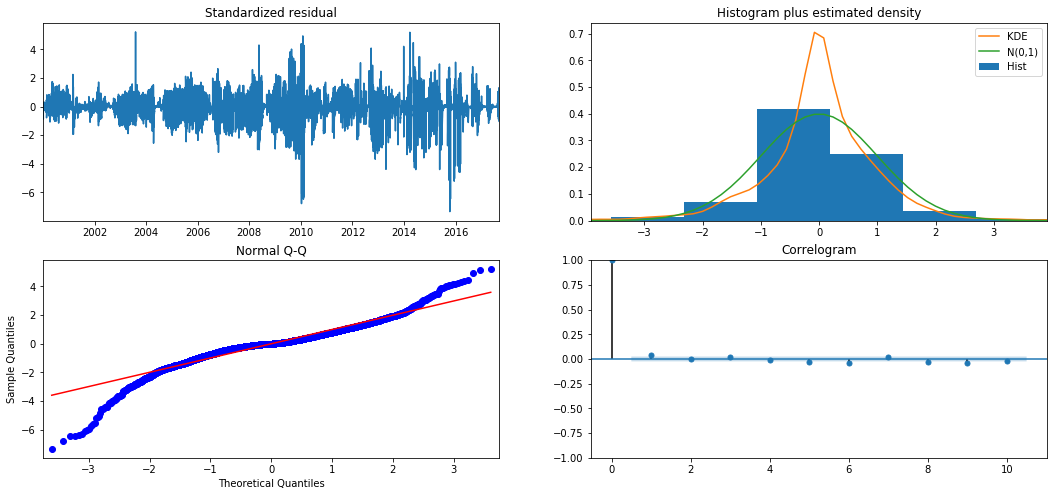

In [18]:
# MODELO IDENTIFICADO POR LA IDENTIFICACIÓN AUTOMATICA
Modelo1Chivor = sm.tsa.statespace.SARIMAX(M1ChivorLogA, order=(4,1,5),trend='c').fit(disp=False)
print(Modelo1Chivor.summary())
print(stats.normaltest(Modelo1Chivor.resid))

Modelo1Chivor.plot_diagnostics(figsize=(18, 8))

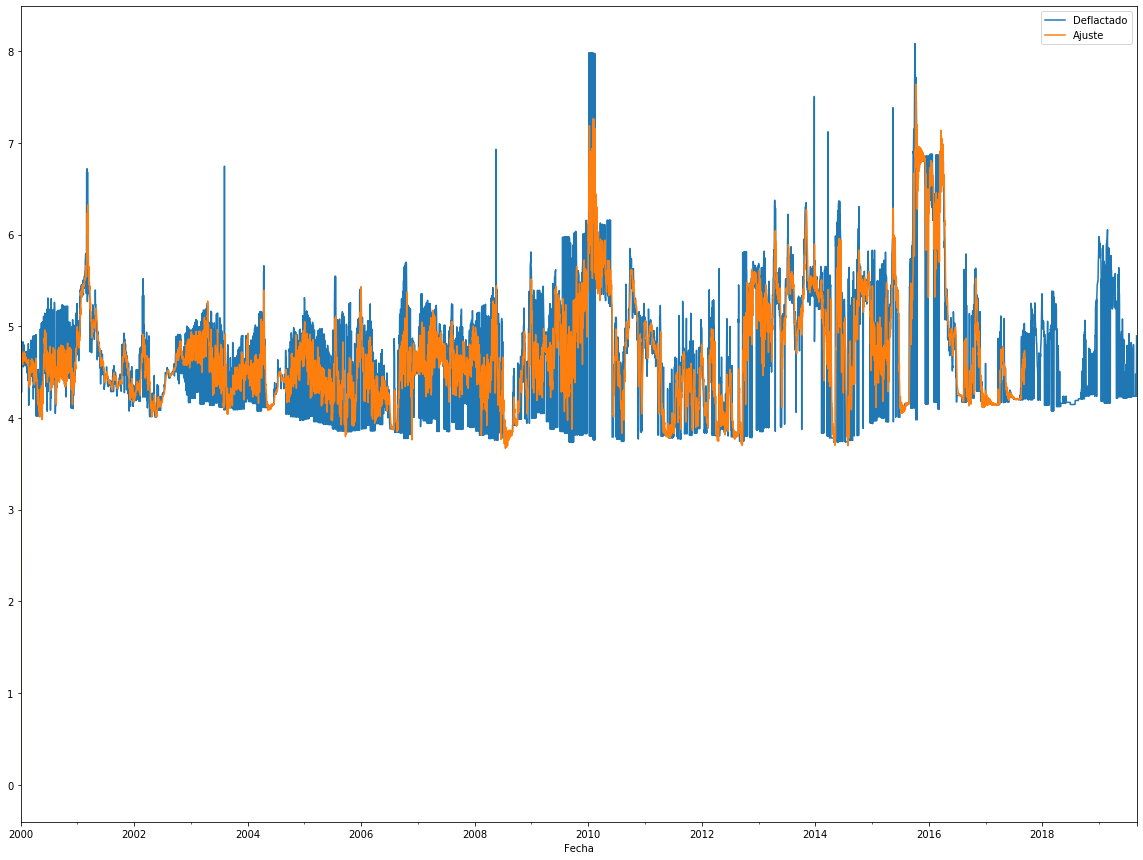

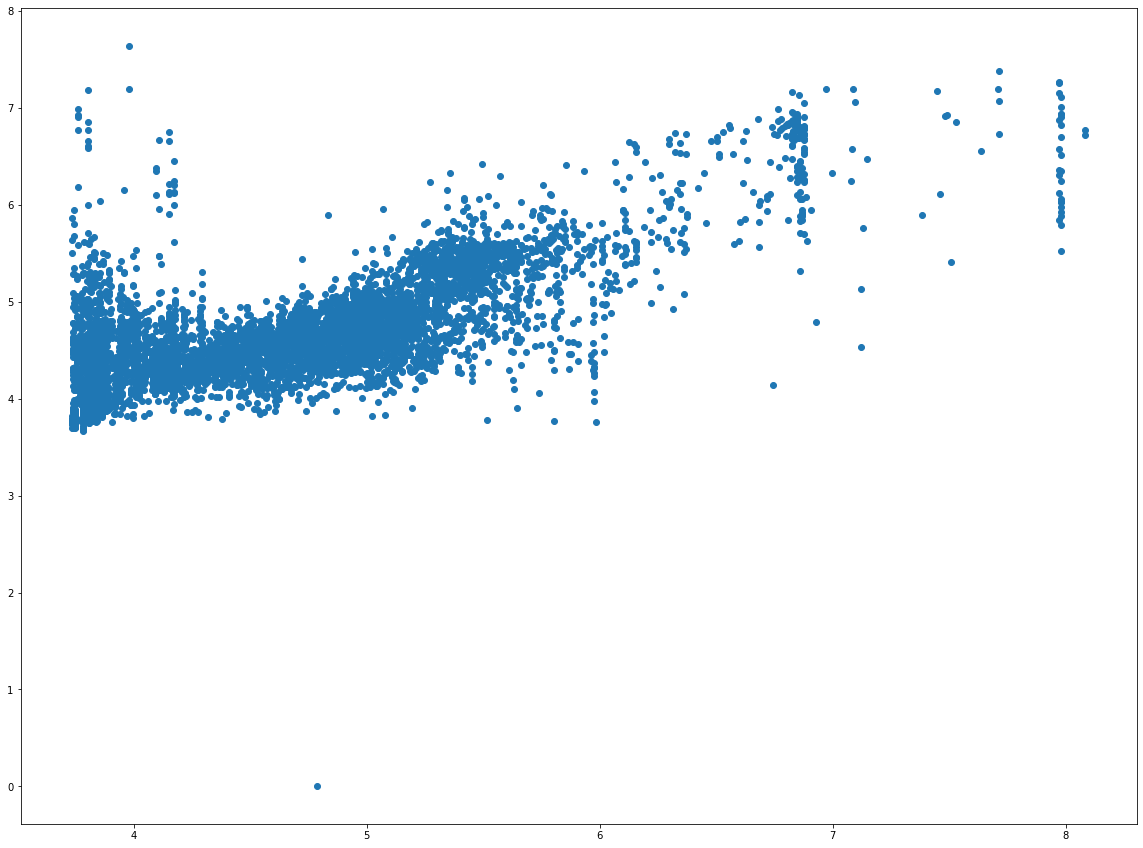

ARIMA model MSE:0.2899042764428618


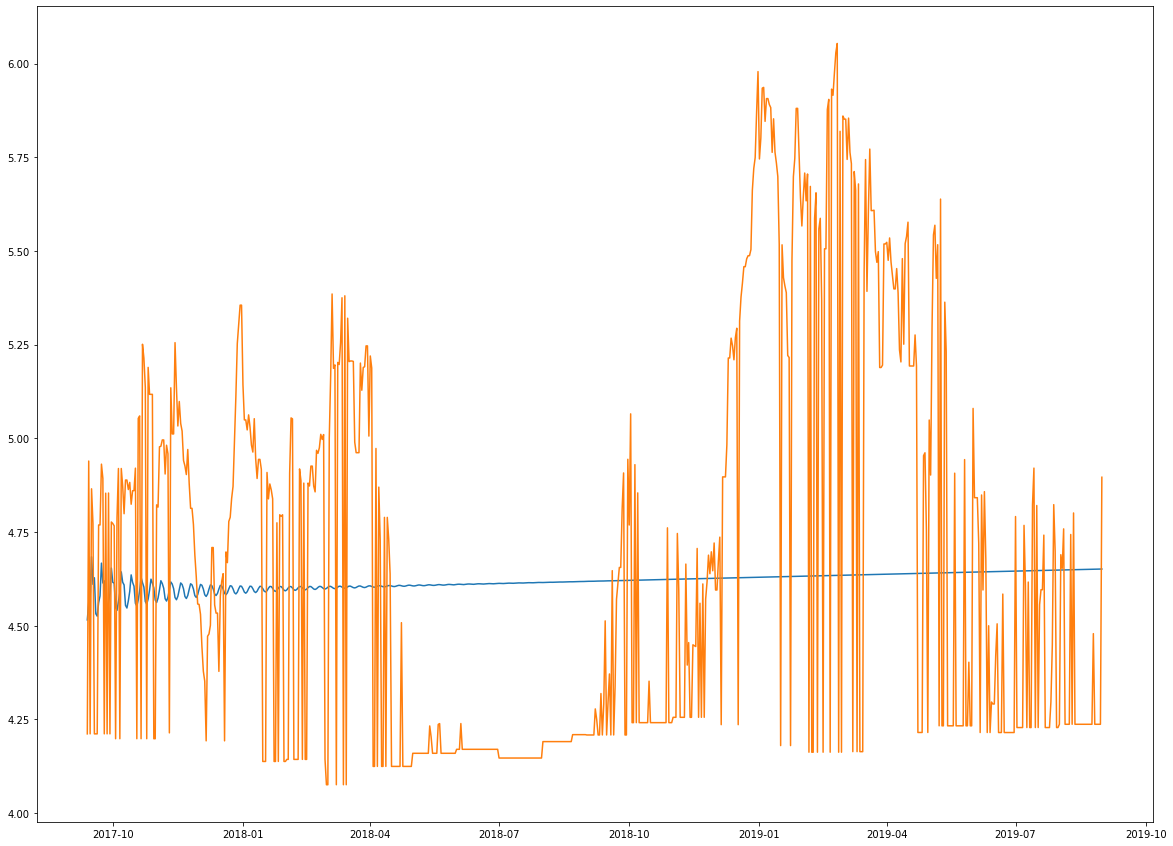

In [19]:
from sklearn.metrics import mean_squared_error
M1ChivorLog['Ajuste'] = Modelo1Chivor.fittedvalues  
plot = M1ChivorLog[['Deflactado', 'Ajuste']].plot(figsize=(20, 15))

plt.figure(figsize=(20,15))
plt.scatter(M1ChivorLog['Deflactado'],M1ChivorLog['Ajuste'])
plt.show()

pred = Modelo1Chivor.predict('2017-09-12','2019-08-31')[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(validar,pred)))
plt.plot(pred)
plt.plot(validar)
plt.show()

<function matplotlib.pyplot.show>

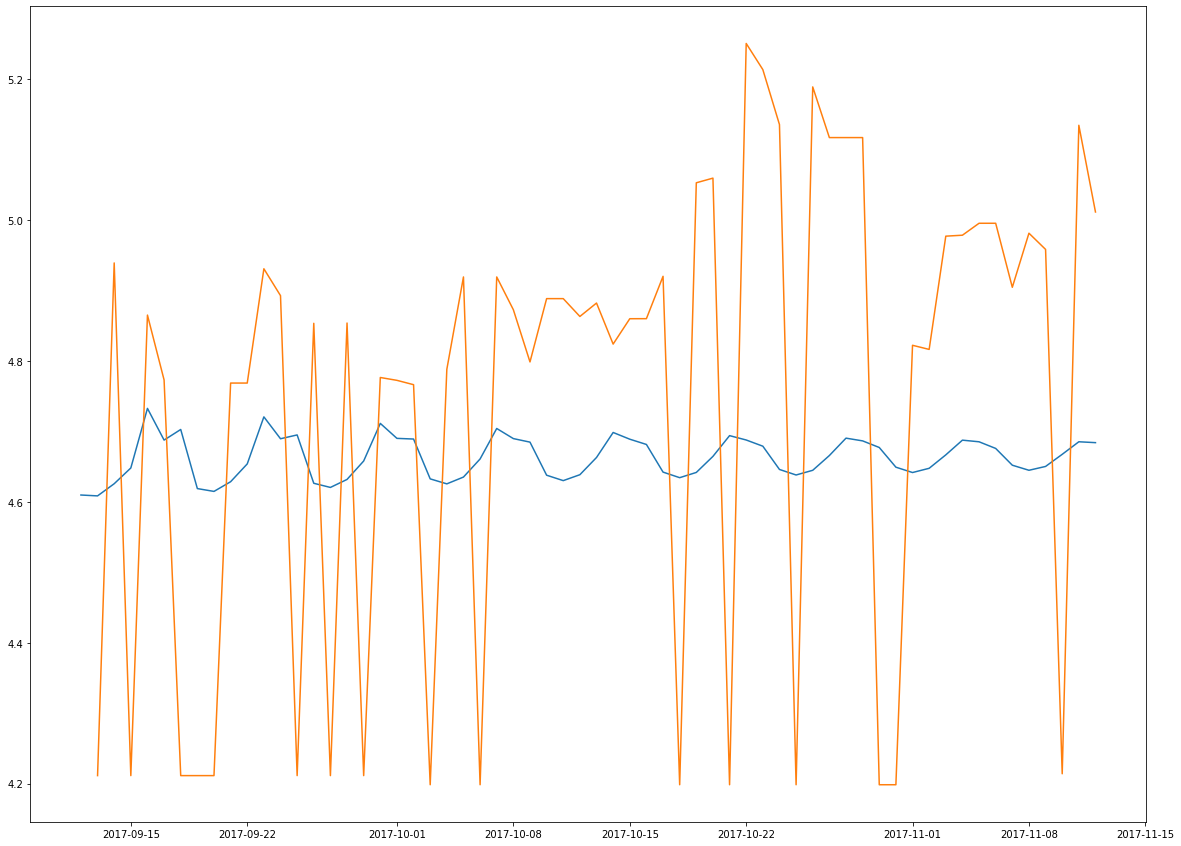

In [21]:
predi = Modelo1Chivor.predict(start='2017-09-12',end='2017-11-12',dynamic=True)
plt.plot(predi)
plt.plot(validar['2017-09-12':'2017-11-12'])
plt.show

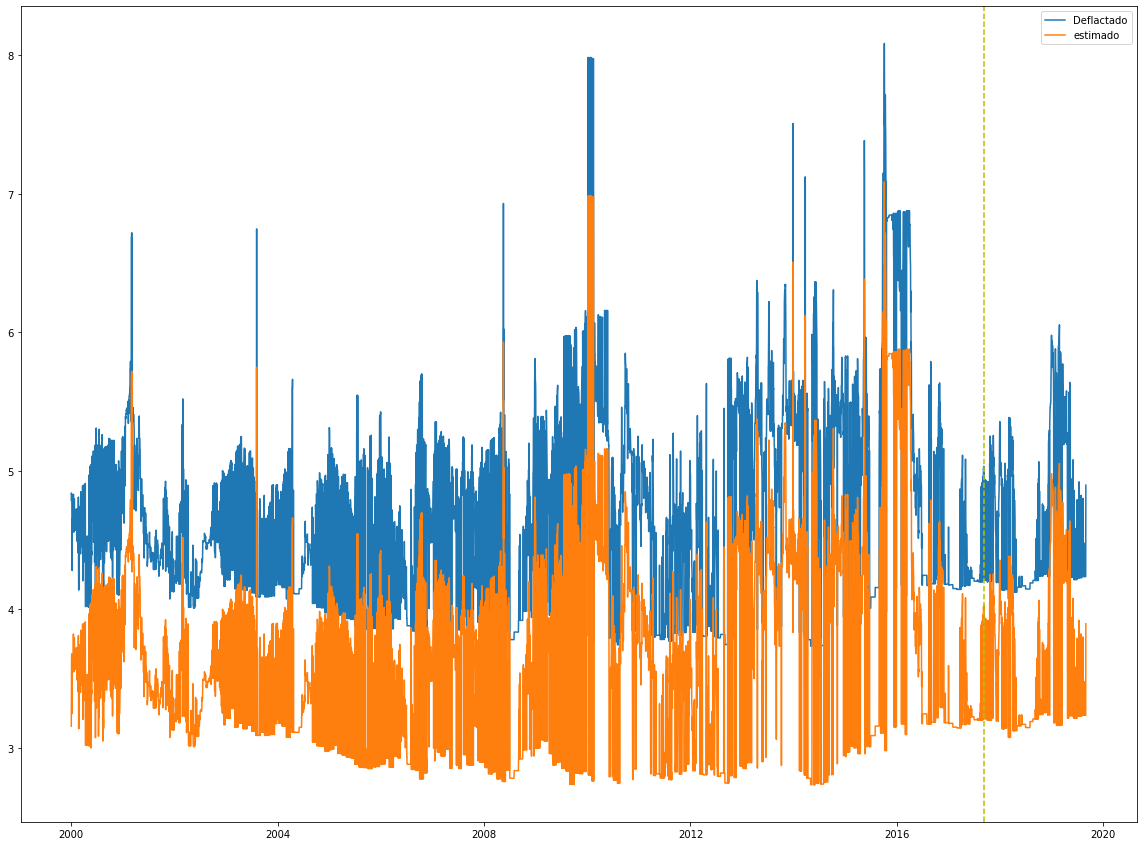

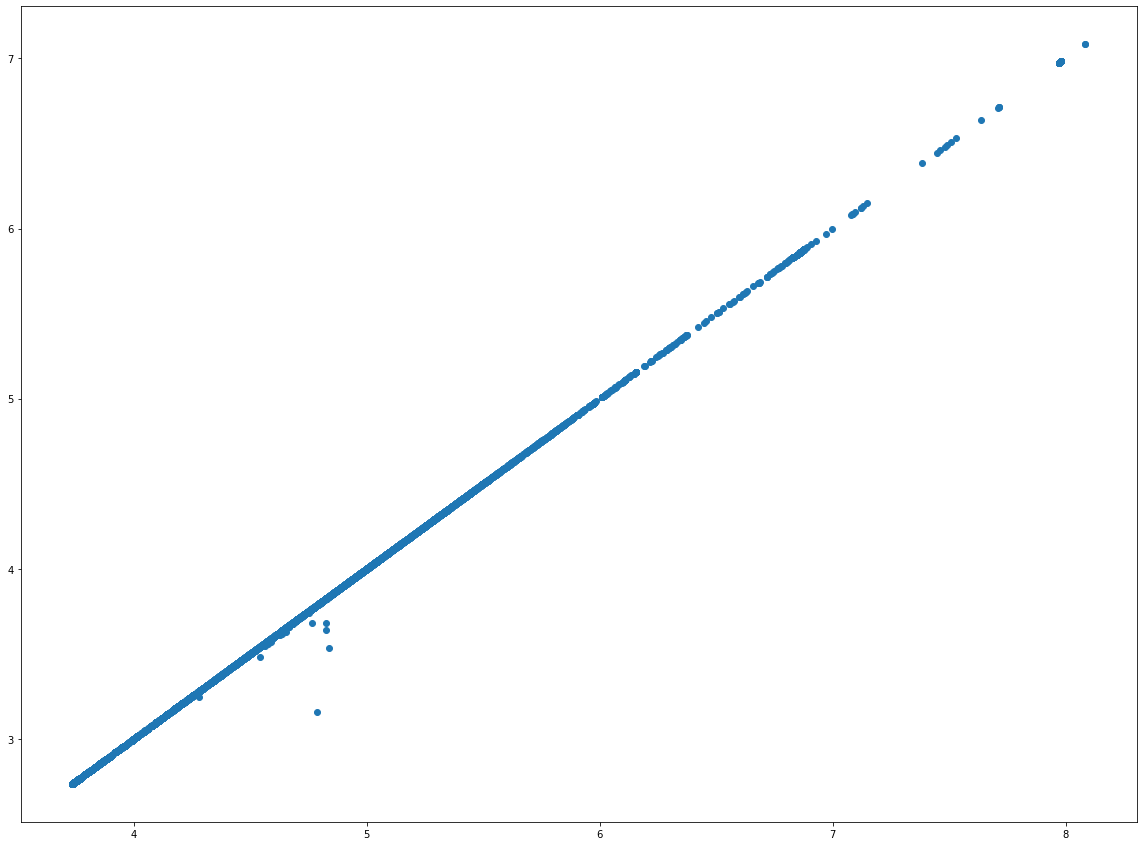

In [39]:
import statsmodels
ar=[-0.4977,0.2350,-0.5492,-0.8781]
ma=[-0.2686,-0.6891,0.7252,0.4200,-0.6840]
sigma=[0.2487]
res=statsmodels.tsa.innovations.arma_innovations.arma_innovations(M1ChivorLog['Deflactado'],ar_params=ar,ma_params=ma,sigma2=sigma)
innovaciones=res[0]
innovaciones_mse=res[1]
estimado=M1ChivorLog['Deflactado'].values-innovaciones_mse
estimado=pd.DataFrame(estimado,index=M1ChivorLog['Deflactado'].index,columns=['estimado'])

plt.plot(M1ChivorLog['Deflactado'])
plt.plot(estimado['estimado'])
plt.legend(['Deflactado','estimado'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()

plt.figure(figsize=(20,15))
plt.scatter(M1ChivorLog['Deflactado'],estimado)
plt.show()

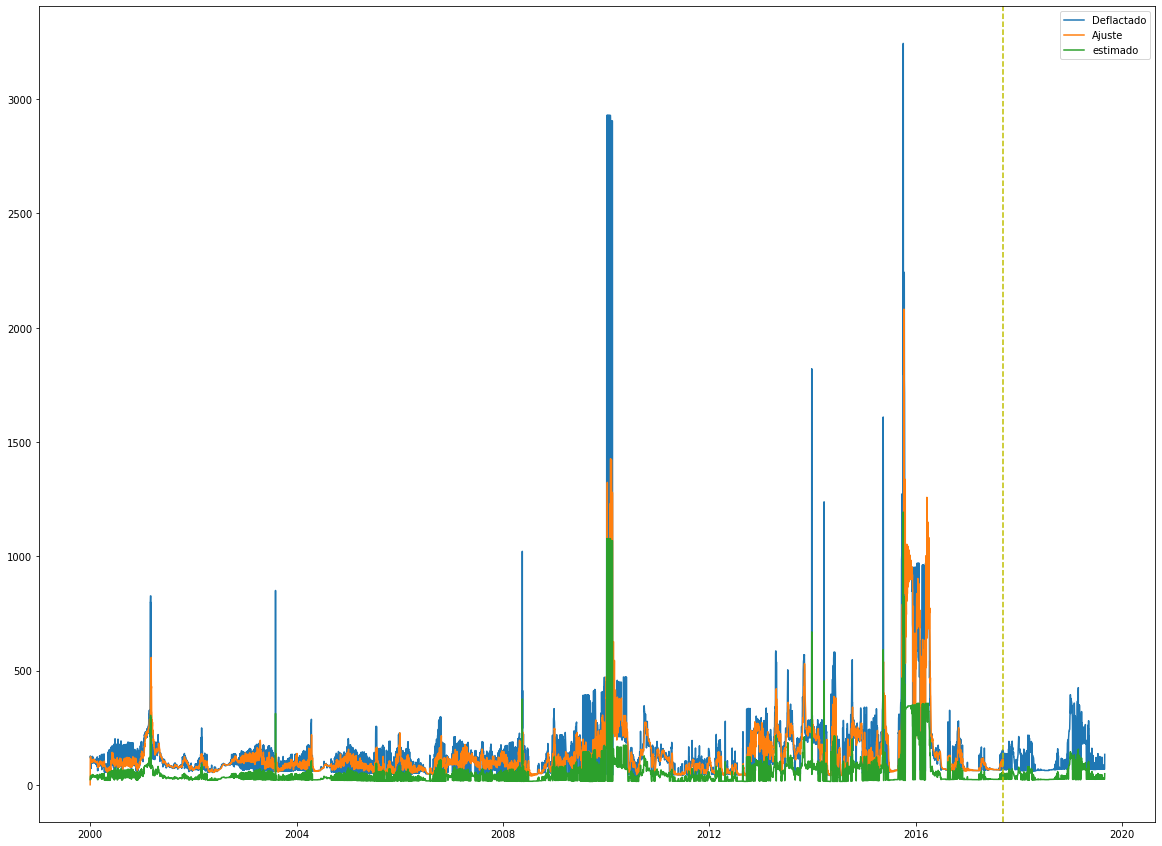

In [41]:
FM1Chivor=np.exp(M1ChivorLog)
Festimado=np.exp(estimado)
plt.plot(FM1Chivor['Deflactado'])
plt.plot(FM1Chivor['Ajuste'])
plt.plot(Festimado)
plt.legend(['Deflactado','Ajuste','estimado'])
plt.axvline(x='2017-09-12',color='y',linestyle='--')
plt.show()
